In [14]:
import pandas as pd
import random
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from wordcloud import WordCloud
from matplotlib.dates import DateFormatter
import matplotlib.dates as mdates

In [13]:
!pip install wordcloud

  Using cached https://files.pythonhosted.org/packages/9f/96/edb94c83dd5295bb12b65aa8a7f5dbacd00b3eb8b4aec59528b6ad21765e/wordcloud-1.9.2-cp37-cp37m-macosx_10_9_x86_64.whl
You are using pip version 10.0.1, however version 23.3 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


# 1. Analyze the provided datasets. Understand the patterns, trends, and relationships in the data that can be used to inform the proposal for collaboration with HelloFresh Canada.

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Reading the files from google drive

In [16]:
user_intrctn_df = pd.read_csv('/Users/krishnamenon/AIMT/WILP/Task 5/User_Interaction_Data.csv')
user_intrctn_df.head()

,User_ID,Sessions_Initiated,Average_Time_per_Session(min),Favorite_Recipes,Last_Purchase
0,1,15,12.5,"Quinoa Salad, Spring Pasta",7/10/23
1,2,10,8.2,"BBQ Burger, Margherita Pizza",7/12/23
2,3,12,10.6,"Grilled Salmon,Tomato Soup",7/11/23
3,4,8,15.3,"Tofu Tacos, Fruit Smoothie",7/9/23
4,5,20,7.8,"Chicken Curry, Mushroom Risotto",7/8/23


In [17]:
user_intrctn_df.columns

Index(['User_ID', 'Sessions_Initiated', 'Average_Time_per_Session(min) ',
       'Favorite_Recipes', 'Last_Purchase'],
      dtype='object')

Removing extra space from column Average_Time_per_Session(min)

In [18]:
user_intrctn_df.rename(columns = {'Average_Time_per_Session(min) ':'Average_Time_per_Session(min)'}, inplace = True)

In [19]:
del_pref_df = pd.read_csv('/Users/krishnamenon/AIMT/WILP/Task 5/Delivery_Preferences.csv')
del_pref_df.head()

,User_ID,Delivery_Address,Delivery_Frequency,Preferred_Delivery_Day
0,1,"123 Main St, Toronto",2 times per week,Tuesday and Friday
1,2,"456 Maple Ave,Vancouver",3 times per week,"Monday, Wednesday, Friday"
2,3,"789 Pine Rd,Montreal",1 times per week,Thursday
3,4,"101 Oak St, Calgary",2 times per week,Wednesday and Saturday
4,5,"222 Elm St, Ottawa",4 times per week,"Monday, Tuesday, Thursday, Saturday"


In [20]:
rec_pref_df = pd.read_csv('/Users/krishnamenon/AIMT/WILP/Task 5/Recipe_Preferences.csv')
rec_pref_df.head()

,User_ID,Preferred_Category,Most_Requested_Recipes
0,1,Salads,"Quinoa Salad, Caesar Salad"
1,2,Meats,"BBQ Burger, Teriyaki Chicken"
2,3,Seafood,"Grilled Salmon, Shrimp Ceviche"
3,4,Vegan,"Fruit Smoothie, Garbanzo Bowl"
4,5,International Dishes,"Chicken Curry, Sushi Rolls"


In [21]:
rec_pref_df.columns

Index(['User_ID', 'Preferred_Category ', 'Most_Requested_Recipes'], dtype='object')

Removing extra space from column Preferred_Category

In [22]:
rec_pref_df.rename(columns = {'Preferred_Category ':'Preferred_Category'}, inplace = True)

##User Interaction Data Analysis

### Calculate averages for session initiation and duration

In [25]:
average_sessions_initiated = user_intrctn_df['Sessions_Initiated'].mean()
average_session_duration = user_intrctn_df['Average_Time_per_Session(min)'].mean()

print('Average Sessions Initiated: ',average_sessions_initiated)
print('Average Session Duration: ',average_session_duration)

Average Sessions Initiated:  13.0
Average Session Duration:  10.879999999999999


### Explore favorite recipes by splitting and counting

In [26]:
favorite_recipes = user_intrctn_df['Favorite_Recipes'].str.split(', ').explode().value_counts()
print('Favorite Recipes: ',favorite_recipes)

Favorite Recipes:  Quinoa Salad                  1
Spring Pasta                  1
BBQ Burger                    1
Margherita Pizza              1
Grilled Salmon,Tomato Soup    1
Tofu Tacos                    1
Fruit Smoothie                1
Chicken Curry                 1
Mushroom Risotto              1
Name: Favorite_Recipes, dtype: int64


### Analyze the last purchase date

In [27]:
last_purchase_dates = pd.to_datetime(user_intrctn_df['Last_Purchase'])
latest_purchase_date = last_purchase_dates.max()
print('Latest Purchase Date:',latest_purchase_date)

Latest Purchase Date: 2023-07-12 00:00:00


## Delivery Preferences Analysis

###Calculate the average delivery frequency and explore preferred delivery days

In [28]:
average_delivery_frequency = del_pref_df['Delivery_Frequency'].str.extract('(\d+)').astype(float).mean()
preferred_delivery = del_pref_df['Preferred_Delivery_Day'].replace(", ", "and").str.split('and').explode()
preferred_delivery_days = preferred_delivery.str.replace(',', '').str.split().explode().value_counts()

print('Average Delivery Frequency: ',average_delivery_frequency[0])
print('Preferred Delivery Days: ',preferred_delivery_days)

Average Delivery Frequency:  2.4
Preferred Delivery Days:  Tuesday      2
Friday       2
Monday       2
Wednesday    2
Thursday     2
Saturday     2
Name: Preferred_Delivery_Day, dtype: int64


## Recipe Preferences Analysis

### Explore preferred recipe categories

In [29]:
preferred_recipe_categories = rec_pref_df['Preferred_Category'].value_counts()

print('Preferred Recipy Categories:\n',preferred_recipe_categories)

Preferred Recipy Categories:
 Salads                  1
Meats                   1
Seafood                 1
Vegan                   1
International Dishes    1
Name: Preferred_Category, dtype: int64


### Analyze most requested recipes

In [30]:
most_requested_recipes = rec_pref_df['Most_Requested_Recipes'].str.split(', ').explode().value_counts()

print('Most Requested Recipes:\n',most_requested_recipes)

Most Requested Recipes:
 Quinoa Salad        1
Caesar Salad        1
BBQ Burger          1
Teriyaki Chicken    1
Grilled Salmon      1
Shrimp Ceviche      1
Fruit Smoothie      1
Garbanzo Bowl       1
Chicken Curry       1
Sushi Rolls         1
Name: Most_Requested_Recipes, dtype: int64


## Printing all the insights

In [31]:
print("User Interaction Data:")
print(f"Average Sessions Initiated: {average_sessions_initiated}")
print(f"Average Session Duration (min): {average_session_duration}")
print("\nFavorite Recipes:")
print(favorite_recipes)
print("\nLast Purchase:")
print(f"Latest Purchase Date: {latest_purchase_date}")

print("\nDelivery Preferences:")
print(f"Average Delivery Frequency: {average_delivery_frequency[0]}")
print("\nPreferred Delivery Days:")
print(preferred_delivery_days)

print("\nRecipe Preferences:")
print("Preferred Recipe Categories:")
print(preferred_recipe_categories)
print("\nMost Requested Recipes:")
print(most_requested_recipes)

User Interaction Data:
Average Sessions Initiated: 13.0
Average Session Duration (min): 10.879999999999999

Favorite Recipes:
Quinoa Salad                  1
Spring Pasta                  1
BBQ Burger                    1
Margherita Pizza              1
Grilled Salmon,Tomato Soup    1
Tofu Tacos                    1
Fruit Smoothie                1
Chicken Curry                 1
Mushroom Risotto              1
Name: Favorite_Recipes, dtype: int64

Last Purchase:
Latest Purchase Date: 2023-07-12 00:00:00

Delivery Preferences:
Average Delivery Frequency: 2.4

Preferred Delivery Days:
Tuesday      2
Friday       2
Monday       2
Wednesday    2
Thursday     2
Saturday     2
Name: Preferred_Delivery_Day, dtype: int64

Recipe Preferences:
Preferred Recipe Categories:
Salads                  1
Meats                   1
Seafood                 1
Vegan                   1
International Dishes    1
Name: Preferred_Category, dtype: int64

Most Requested Recipes:
Quinoa Salad        1
Caesar Sala

## Merging the 3 datasets

In [23]:
combined_data = del_pref_df.merge(user_intrctn_df, left_on='User_ID', right_on='User_ID')
final_combined_data = combined_data.merge(rec_pref_df, left_on='User_ID', right_on='User_ID')
final_combined_data.head()

,User_ID,Delivery_Address,Delivery_Frequency,Preferred_Delivery_Day,Sessions_Initiated,Average_Time_per_Session(min),Favorite_Recipes,Last_Purchase,Preferred_Category,Most_Requested_Recipes
0,1,"123 Main St, Toronto",2 times per week,Tuesday and Friday,15,12.5,"Quinoa Salad, Spring Pasta",7/10/23,Salads,"Quinoa Salad, Caesar Salad"
1,2,"456 Maple Ave,Vancouver",3 times per week,"Monday, Wednesday, Friday",10,8.2,"BBQ Burger, Margherita Pizza",7/12/23,Meats,"BBQ Burger, Teriyaki Chicken"
2,3,"789 Pine Rd,Montreal",1 times per week,Thursday,12,10.6,"Grilled Salmon,Tomato Soup",7/11/23,Seafood,"Grilled Salmon, Shrimp Ceviche"
3,4,"101 Oak St, Calgary",2 times per week,Wednesday and Saturday,8,15.3,"Tofu Tacos, Fruit Smoothie",7/9/23,Vegan,"Fruit Smoothie, Garbanzo Bowl"
4,5,"222 Elm St, Ottawa",4 times per week,"Monday, Tuesday, Thursday, Saturday",20,7.8,"Chicken Curry, Mushroom Risotto",7/8/23,International Dishes,"Chicken Curry, Sushi Rolls"


In [24]:
final_combined_data.head()

,User_ID,Delivery_Address,Delivery_Frequency,Preferred_Delivery_Day,Sessions_Initiated,Average_Time_per_Session(min),Favorite_Recipes,Last_Purchase,Preferred_Category,Most_Requested_Recipes
0,1,"123 Main St, Toronto",2 times per week,Tuesday and Friday,15,12.5,"Quinoa Salad, Spring Pasta",7/10/23,Salads,"Quinoa Salad, Caesar Salad"
1,2,"456 Maple Ave,Vancouver",3 times per week,"Monday, Wednesday, Friday",10,8.2,"BBQ Burger, Margherita Pizza",7/12/23,Meats,"BBQ Burger, Teriyaki Chicken"
2,3,"789 Pine Rd,Montreal",1 times per week,Thursday,12,10.6,"Grilled Salmon,Tomato Soup",7/11/23,Seafood,"Grilled Salmon, Shrimp Ceviche"
3,4,"101 Oak St, Calgary",2 times per week,Wednesday and Saturday,8,15.3,"Tofu Tacos, Fruit Smoothie",7/9/23,Vegan,"Fruit Smoothie, Garbanzo Bowl"
4,5,"222 Elm St, Ottawa",4 times per week,"Monday, Tuesday, Thursday, Saturday",20,7.8,"Chicken Curry, Mushroom Risotto",7/8/23,International Dishes,"Chicken Curry, Sushi Rolls"


# 2.Design data visualization to effectively communicate the analyzed data to business stakeholders.

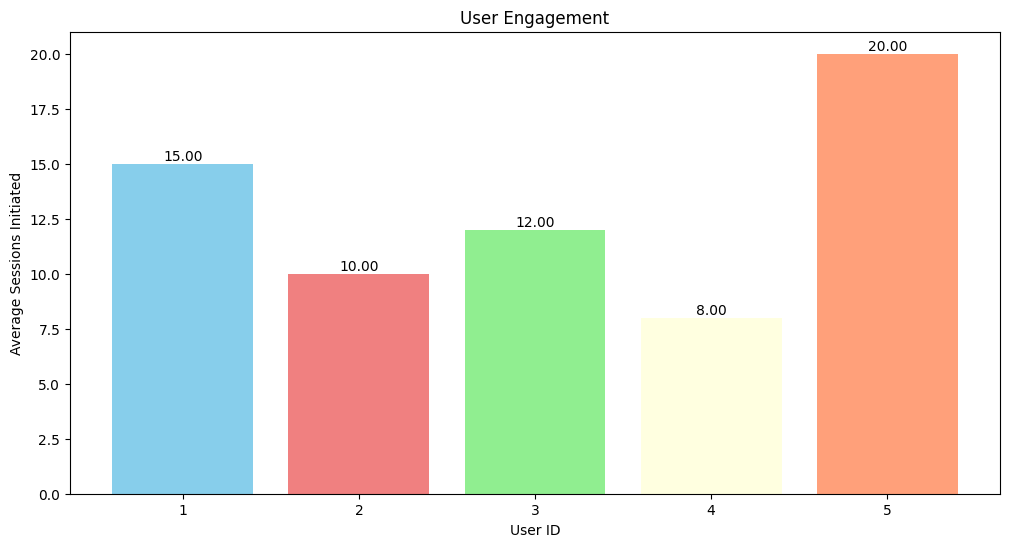

In [ ]:
import matplotlib.pyplot as plt

# Define a custom color palette
colors = ['skyblue', 'lightcoral', 'lightgreen', 'lightyellow', 'lightsalmon']

# Data
user_ids = final_combined_data['User_ID']
average_sessions = final_combined_data['Sessions_Initiated']

# Bar chart for average sessions initiated with custom colors
plt.figure(figsize=(12, 6))
bars = plt.bar(user_ids, average_sessions, color=colors)
plt.xlabel('User ID')
plt.ylabel('Average Sessions Initiated')
plt.title('User Engagement')

# Add values within the bars
for bar, value in zip(bars, average_sessions):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), f'{value:.2f}', ha='center', va='bottom')

plt.show()

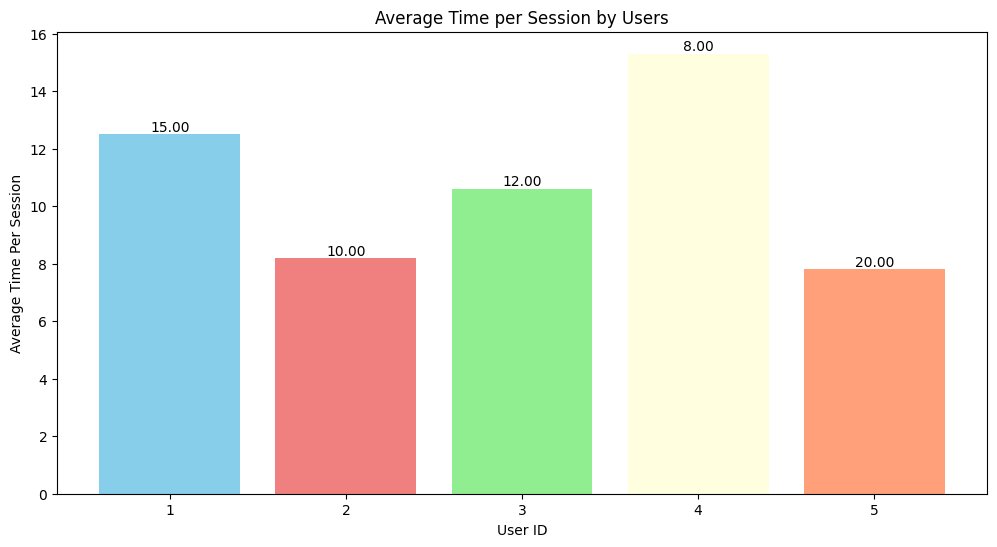

In [ ]:
import matplotlib.pyplot as plt

# Define a custom color palette
colors = ['skyblue', 'lightcoral', 'lightgreen', 'lightyellow', 'lightsalmon']

# Data
user_ids = final_combined_data['User_ID']
average_time = final_combined_data['Average_Time_per_Session(min)']

# Bar chart for average sessions initiated with custom colors
plt.figure(figsize=(12, 6))
bars = plt.bar(user_ids, average_time, color=colors)
plt.xlabel('User ID')
plt.ylabel('Average Time Per Session')
plt.title('Average Time per Session by Users')

# Add values within the bars
for bar, value in zip(bars, average_sessions):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), f'{value:.2f}', ha='center', va='bottom')

plt.show()

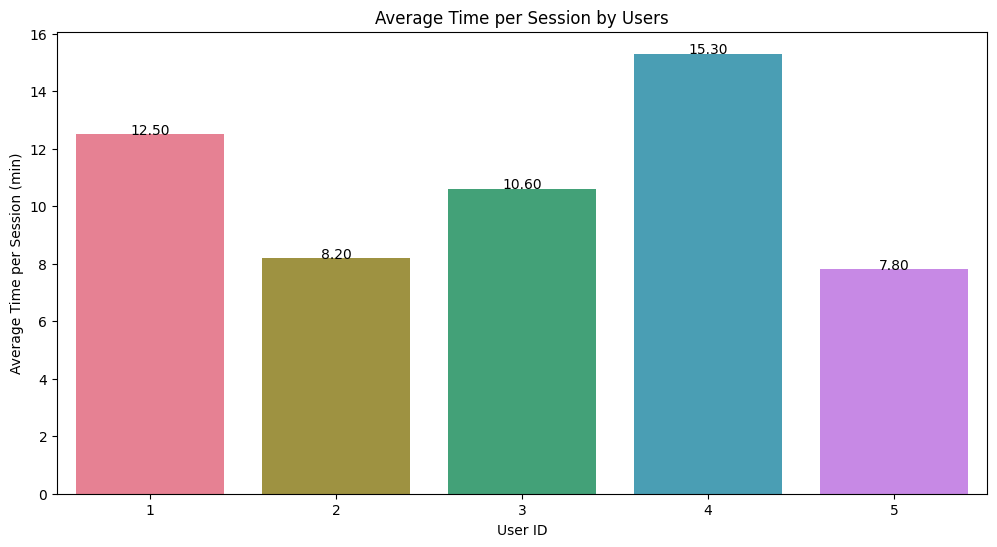

In [ ]:
plt.figure(figsize=(12, 6))
ax = sns.barplot(x=final_combined_data['User_ID'], y=final_combined_data['Average_Time_per_Session(min)'], palette='husl')
plt.xlabel('User ID')
plt.ylabel('Average Time per Session (min)')
plt.title('Average Time per Session by Users')
# Add values on the bars
for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='baseline')

plt.show()


In [ ]:
type(preferred_delivery_days)

pandas.core.series.Series

In [ ]:
pref_del_dy= pd.DataFrame({'Days':preferred_delivery_days.index, 'count':preferred_delivery_days.values})
pref_del_dy.head()

,Days,count
0,Tuesday,2
1,Friday,2
2,Monday,2
3,Wednesday,2
4,Thursday,2


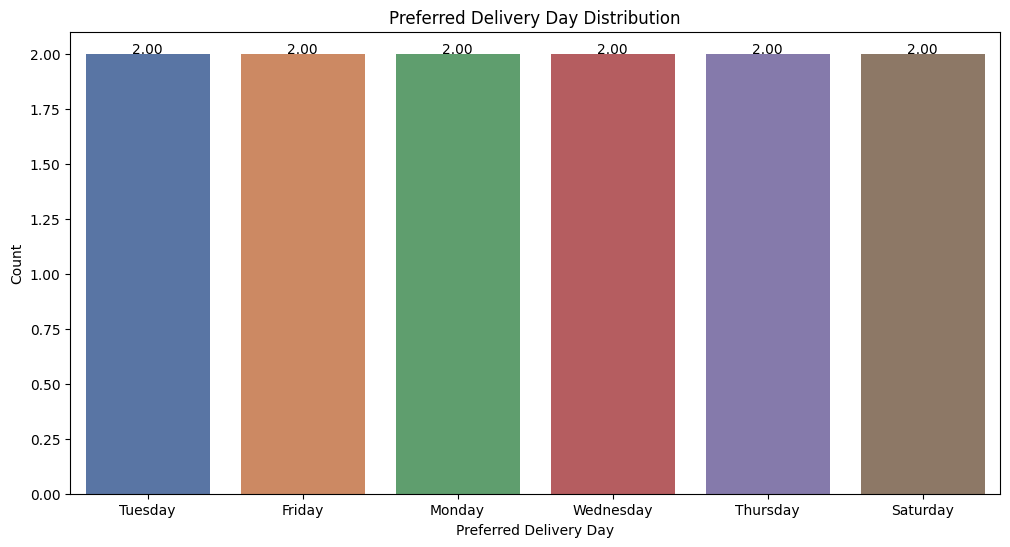

In [ ]:
plt.figure(figsize=(12, 6))
ax = sns.barplot( x=pref_del_dy['Days'],y = pref_del_dy['count'], palette='deep')
plt.xlabel('Preferred Delivery Day')
plt.ylabel('Count')
plt.title('Preferred Delivery Day Distribution')
# Add values on the bars
for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='baseline')

plt.show()


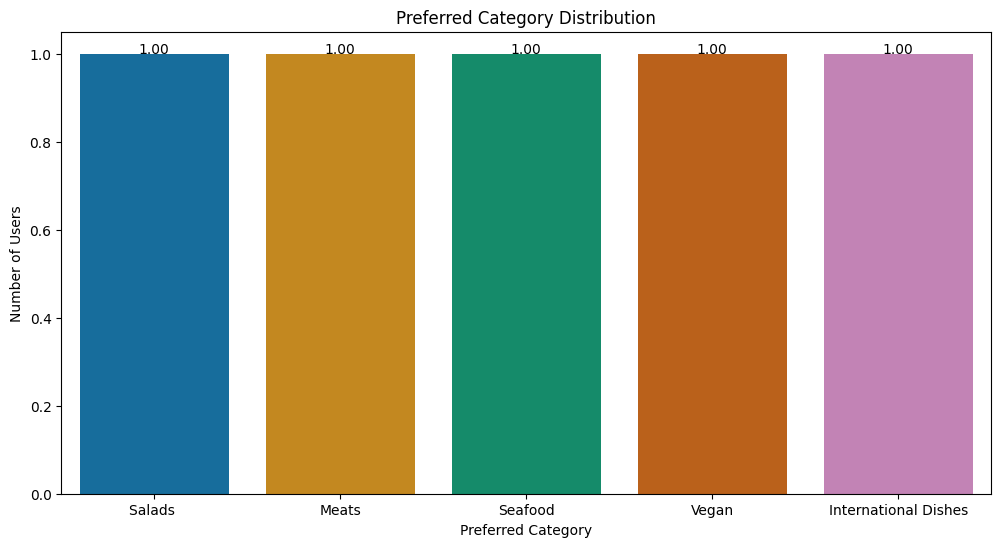

In [ ]:
plt.figure(figsize=(12, 6))
ax = sns.countplot( data=final_combined_data,x='Preferred_Category', palette='colorblind')
plt.xlabel('Preferred Category')
plt.ylabel('Number of Users')
plt.title('Preferred Category Distribution')
# Add values on the bars
for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='baseline')

plt.show()


<ipython-input-105-e8db909fe54c>:8: UserWarning: The palette list has more values (10) than needed (5), which may not be intended.
  ax = sns.scatterplot(data=final_combined_data, x='Sessions_Initiated', y='Average_Time_per_Session(min)', hue='User_ID', palette=colors, s=point_size)


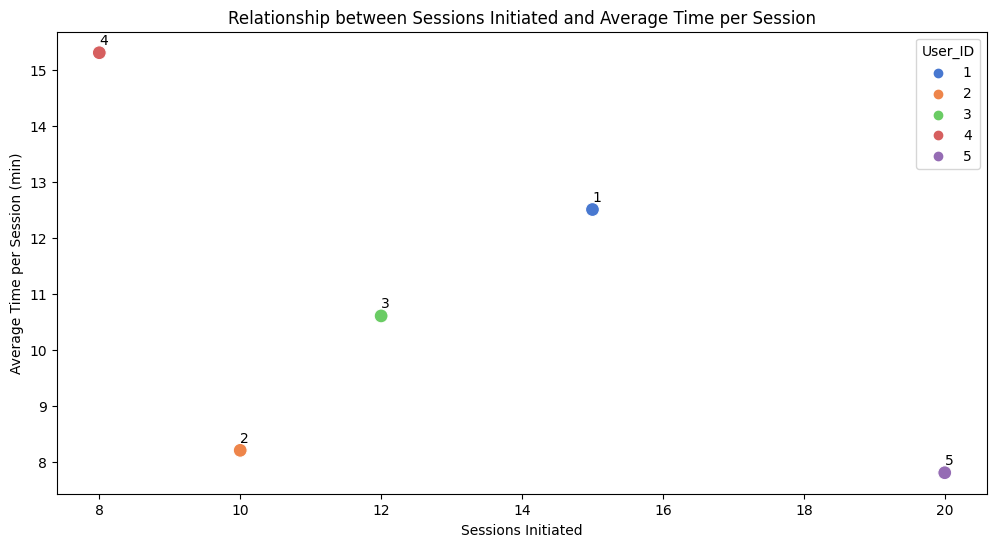

In [ ]:
colors = sns.color_palette("muted", as_cmap=True)

# Set the size for the points (larger size)
point_size = 100
text_offset = (0, 0.15)  # Offset for text labels

plt.figure(figsize=(12, 6))
ax = sns.scatterplot(data=final_combined_data, x='Sessions_Initiated', y='Average_Time_per_Session(min)', hue='User_ID', palette=colors, s=point_size)
plt.xlabel('Sessions Initiated')
plt.ylabel('Average Time per Session (min)')
plt.title('Relationship between Sessions Initiated and Average Time per Session')

# Add values on the points with offset
for line in range(0, final_combined_data.shape[0]):
    ax.text(final_combined_data['Sessions_Initiated'][line] + text_offset[0], final_combined_data['Average_Time_per_Session(min)'][line] + text_offset[1], f'{final_combined_data["User_ID"][line]}', horizontalalignment='left', size='medium', color='black')

plt.show()

In [ ]:
final_combined_data.head()

,User_ID,Delivery_Address,Delivery_Frequency,Preferred_Delivery_Day,Sessions_Initiated,Average_Time_per_Session(min),Favorite_Recipes,Last_Purchase,Preferred_Category,Most_Requested_Recipes
0,1,"123 Main St, Toronto",2 times per week,Tuesday and Friday,15,12.5,"Quinoa Salad, Spring Pasta",7/10/23,Salads,"Quinoa Salad, Caesar Salad"
1,2,"456 Maple Ave,Vancouver",3 times per week,"Monday, Wednesday, Friday",10,8.2,"BBQ Burger, Margherita Pizza",7/12/23,Meats,"BBQ Burger, Teriyaki Chicken"
2,3,"789 Pine Rd,Montreal",1 times per week,Thursday,12,10.6,"Grilled Salmon,Tomato Soup",7/11/23,Seafood,"Grilled Salmon, Shrimp Ceviche"
3,4,"101 Oak St, Calgary",2 times per week,Wednesday and Saturday,8,15.3,"Tofu Tacos, Fruit Smoothie",7/9/23,Vegan,"Fruit Smoothie, Garbanzo Bowl"
4,5,"222 Elm St, Ottawa",4 times per week,"Monday, Tuesday, Thursday, Saturday",20,7.8,"Chicken Curry, Mushroom Risotto",7/8/23,International Dishes,"Chicken Curry, Sushi Rolls"


In [ ]:
final_combined_data.rename(columns = {'Delivery_Frequency':'Delivery_Frequency(times per week)'}, inplace = True)

In [ ]:
final_combined_data.head()

,User_ID,Delivery_Address,Delivery_Frequency(times per week),Preferred_Delivery_Day,Sessions_Initiated,Average_Time_per_Session(min),Favorite_Recipes,Last_Purchase,Preferred_Category,Most_Requested_Recipes
0,1,"123 Main St, Toronto",2 times per week,Tuesday and Friday,15,12.5,"Quinoa Salad, Spring Pasta",7/10/23,Salads,"Quinoa Salad, Caesar Salad"
1,2,"456 Maple Ave,Vancouver",3 times per week,"Monday, Wednesday, Friday",10,8.2,"BBQ Burger, Margherita Pizza",7/12/23,Meats,"BBQ Burger, Teriyaki Chicken"
2,3,"789 Pine Rd,Montreal",1 times per week,Thursday,12,10.6,"Grilled Salmon,Tomato Soup",7/11/23,Seafood,"Grilled Salmon, Shrimp Ceviche"
3,4,"101 Oak St, Calgary",2 times per week,Wednesday and Saturday,8,15.3,"Tofu Tacos, Fruit Smoothie",7/9/23,Vegan,"Fruit Smoothie, Garbanzo Bowl"
4,5,"222 Elm St, Ottawa",4 times per week,"Monday, Tuesday, Thursday, Saturday",20,7.8,"Chicken Curry, Mushroom Risotto",7/8/23,International Dishes,"Chicken Curry, Sushi Rolls"


In [ ]:
final_combined_data['Delivery_Frequency(times per week)']=final_combined_data['Delivery_Frequency(times per week)'].str.replace('times per week', '')
final_combined_data.head()

,User_ID,Delivery_Address,Delivery_Frequency(times per week),Preferred_Delivery_Day,Sessions_Initiated,Average_Time_per_Session(min),Favorite_Recipes,Last_Purchase,Preferred_Category,Most_Requested_Recipes
0,1,"123 Main St, Toronto",2,Tuesday and Friday,15,12.5,"Quinoa Salad, Spring Pasta",7/10/23,Salads,"Quinoa Salad, Caesar Salad"
1,2,"456 Maple Ave,Vancouver",3,"Monday, Wednesday, Friday",10,8.2,"BBQ Burger, Margherita Pizza",7/12/23,Meats,"BBQ Burger, Teriyaki Chicken"
2,3,"789 Pine Rd,Montreal",1,Thursday,12,10.6,"Grilled Salmon,Tomato Soup",7/11/23,Seafood,"Grilled Salmon, Shrimp Ceviche"
3,4,"101 Oak St, Calgary",2,Wednesday and Saturday,8,15.3,"Tofu Tacos, Fruit Smoothie",7/9/23,Vegan,"Fruit Smoothie, Garbanzo Bowl"
4,5,"222 Elm St, Ottawa",4,"Monday, Tuesday, Thursday, Saturday",20,7.8,"Chicken Curry, Mushroom Risotto",7/8/23,International Dishes,"Chicken Curry, Sushi Rolls"


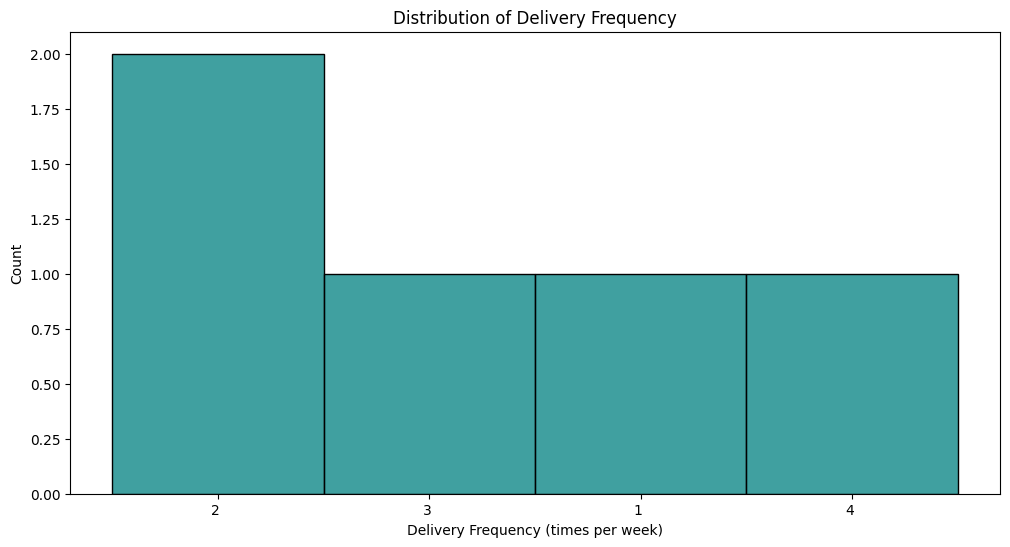

In [ ]:
plt.figure(figsize=(12, 6))
sns.histplot(data=final_combined_data, x='Delivery_Frequency(times per week)', bins=10,  color='teal', edgecolor='black')
plt.xlabel('Delivery Frequency (times per week)')
plt.ylabel('Count')
plt.title('Distribution of Delivery Frequency')

plt.show()

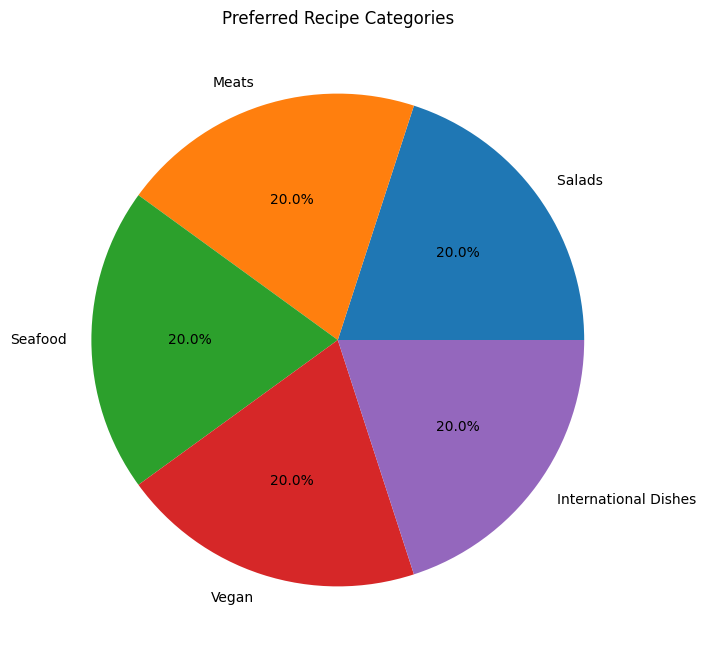

In [ ]:
category_counts = final_combined_data['Preferred_Category'].value_counts()
plt.figure(figsize=(8, 8))
plt.pie(category_counts, labels=category_counts.index, autopct='%1.1f%%')
plt.title('Preferred Recipe Categories')
plt.show()


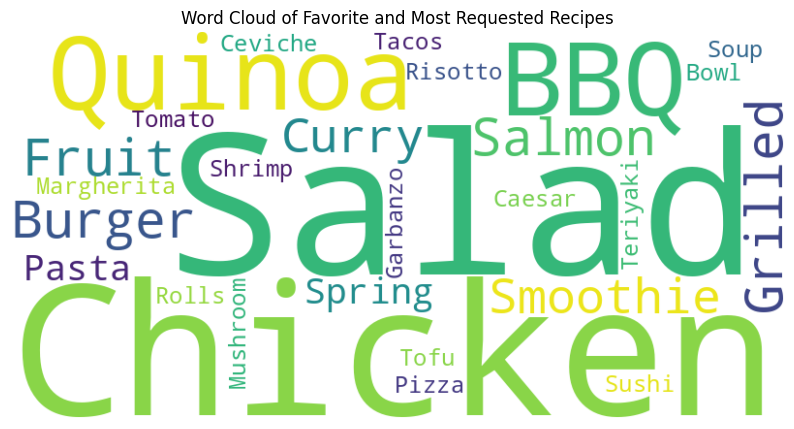

In [ ]:
# Combine all the favorite recipes into a single string
favorite_recipes_text = ','.join(final_combined_data['Favorite_Recipes'])
favorite_most_text = ','.join(final_combined_data['Most_Requested_Recipes'])
favorite_most_recipes_text = favorite_recipes_text+','+favorite_most_text

# Generate a word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(favorite_most_recipes_text)

plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Favorite and Most Requested Recipes')
plt.show()


In [ ]:
favorite_most_text = ','.join(final_combined_data['Most_Requested_Recipes'])
favorite_most_recipes_text = favorite_recipes_text+','+favorite_most_text
favorite_most_recipes_text

'Quinoa Salad, Spring Pasta,BBQ Burger, Margherita Pizza,Grilled Salmon,Tomato Soup,Tofu Tacos, Fruit Smoothie,Chicken Curry, Mushroom Risotto,Quinoa Salad, Caesar Salad,BBQ Burger, Teriyaki Chicken,Grilled Salmon, Shrimp Ceviche,Fruit Smoothie, Garbanzo Bowl,Chicken Curry, Sushi Rolls'

In [ ]:
# Combine the Favorite_Recipes and Most_Requested_Recipes columns
final_combined_data['Fav_most_req'] = final_combined_data['Favorite_Recipes'] + ', ' + final_combined_data['Most_Requested_Recipes']

# Create a function to count the occurrences of each recipe
def count_recipes(recipe_list):
    recipe_count = {}
    recipes = recipe_list.split(', ')
    for recipe in recipes:
        if recipe in recipe_count:
            recipe_count[recipe] += 1
        else:
            recipe_count[recipe] = 1
    return recipe_count

# Apply the count_recipes function to the Fav_most_req column
final_combined_data['Fav_most_req'] = final_combined_data['Fav_most_req'].apply(count_recipes)


In [ ]:
final_combined_data['Fav_most_req'][0]

{'Quinoa Salad': 2, 'Spring Pasta': 1, 'Caesar Salad': 1}

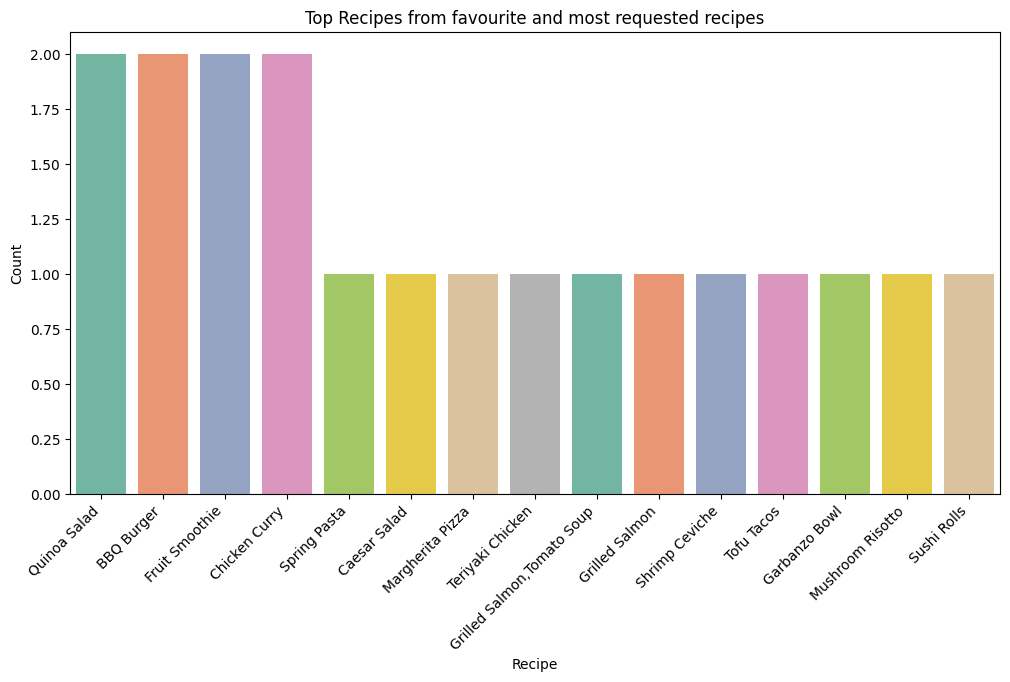

In [ ]:
# Function to extract and sort the most common recipes from the dictionaries
def get_top_recipes(recipe_count_dict, top_n=5):
    sorted_recipes = sorted(recipe_count_dict.items(), key=lambda x: x[1], reverse=True)
    return dict(sorted_recipes[:top_n])

# Get the top 5 recipes for each row
final_combined_data['Top_Recipes'] = final_combined_data['Fav_most_req'].apply(get_top_recipes)

# Count the total occurrences of the top recipes
top_recipe_counts = {}
for top_recipes in final_combined_data['Top_Recipes']:
    for recipe, count in top_recipes.items():
        if recipe in top_recipe_counts:
            top_recipe_counts[recipe] += count
        else:
            top_recipe_counts[recipe] = count

# Sort the recipes by total occurrence count
sorted_top_recipe_counts = dict(sorted(top_recipe_counts.items(), key=lambda x: x[1], reverse=True))

# Create a bar chart for the top recipes
plt.figure(figsize=(12, 6))
sns.barplot(x=list(sorted_top_recipe_counts.keys()), y=list(sorted_top_recipe_counts.values()), palette='Set2')
plt.xlabel('Recipe')
plt.ylabel('Count')
plt.title('Top Recipes from favourite and most requested recipes')
plt.xticks(rotation=45, ha='right')
plt.show()

In [ ]:
final_combined_data['Fav_most_req'][0]

{'Quinoa Salad': 2, 'Spring Pasta': 1, 'Caesar Salad': 1}

In [ ]:
recipe_counts_list = final_combined_data['Fav_most_req'].apply(lambda x: [x]).explode()

# Convert the list of dictionaries to a DataFrame
recipe_counts_df = pd.DataFrame(recipe_counts_list.tolist())

# Fill missing values with 0 (recipes that don't appear for a user)
recipe_counts_df = recipe_counts_df.fillna(0)

# Sum the counts for each recipe to get the total count
recipe_counts_df = recipe_counts_df.groupby(level=0).sum()

# Reset the index to have a default integer index
recipe_counts_df = recipe_counts_df.reset_index()

# Display the new DataFrame
recipe_counts_df.head()

,index,Quinoa Salad,Spring Pasta,Caesar Salad,BBQ Burger,Margherita Pizza,Teriyaki Chicken,"Grilled Salmon,Tomato Soup",Grilled Salmon,Shrimp Ceviche,Tofu Tacos,Fruit Smoothie,Garbanzo Bowl,Chicken Curry,Mushroom Risotto,Sushi Rolls
0,0,2.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1,0.0,0.0,0.0,2.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,1.0,0.0,0.0,0.0
4,4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,1.0,1.0


In [ ]:
# Transpose the DataFrame
recipe_counts_transposed = recipe_counts_df.set_index('index').T.reset_index()

# Rename the columns
recipe_counts_transposed.columns = ['Recipe'] + list(range(len(recipe_counts_transposed.columns) - 1))

# Reset the index
recipe_counts_transposed = recipe_counts_transposed.reset_index(drop=True)

# Display the transposed DataFrame
print(recipe_counts_transposed)

                        Recipe    0    1    2    3    4
0                 Quinoa Salad  2.0  0.0  0.0  0.0  0.0
1                 Spring Pasta  1.0  0.0  0.0  0.0  0.0
2                 Caesar Salad  1.0  0.0  0.0  0.0  0.0
3                   BBQ Burger  0.0  2.0  0.0  0.0  0.0
4             Margherita Pizza  0.0  1.0  0.0  0.0  0.0
5             Teriyaki Chicken  0.0  1.0  0.0  0.0  0.0
6   Grilled Salmon,Tomato Soup  0.0  0.0  1.0  0.0  0.0
7               Grilled Salmon  0.0  0.0  1.0  0.0  0.0
8               Shrimp Ceviche  0.0  0.0  1.0  0.0  0.0
9                   Tofu Tacos  0.0  0.0  0.0  1.0  0.0
10              Fruit Smoothie  0.0  0.0  0.0  2.0  0.0
11               Garbanzo Bowl  0.0  0.0  0.0  1.0  0.0
12               Chicken Curry  0.0  0.0  0.0  0.0  2.0
13            Mushroom Risotto  0.0  0.0  0.0  0.0  1.0
14                 Sushi Rolls  0.0  0.0  0.0  0.0  1.0


In [ ]:
# Sum the values in each row and create a new column
recipe_counts_transposed['Sum'] = recipe_counts_transposed.iloc[:, 1:].sum(axis=1).astype(int)

# Drop the individual recipe count columns
recipe_counts_transposed = recipe_counts_transposed.drop(recipe_counts_transposed.columns[1:-1], axis=1)

# Display the DataFrame with the sum column
print(recipe_counts_transposed)

                        Recipe  Sum
0                 Quinoa Salad    2
1                 Spring Pasta    1
2                 Caesar Salad    1
3                   BBQ Burger    2
4             Margherita Pizza    1
5             Teriyaki Chicken    1
6   Grilled Salmon,Tomato Soup    1
7               Grilled Salmon    1
8               Shrimp Ceviche    1
9                   Tofu Tacos    1
10              Fruit Smoothie    2
11               Garbanzo Bowl    1
12               Chicken Curry    2
13            Mushroom Risotto    1
14                 Sushi Rolls    1


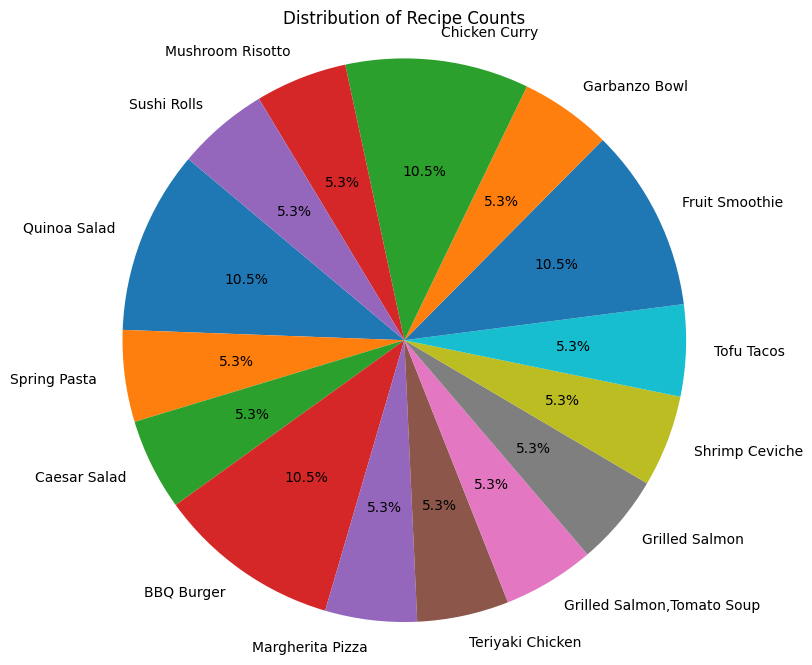

In [ ]:
# Data for the pie chart
labels = recipe_counts_transposed['Recipe']
sizes = recipe_counts_transposed['Sum']

# Create a pie chart
plt.figure(figsize=(8, 8))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140)
plt.axis('equal')
plt.title('Distribution of Recipe Counts')
plt.show()

In [ ]:
final_combined_data.head()

,User_ID,Delivery_Address,Delivery_Frequency(times per week),Preferred_Delivery_Day,Sessions_Initiated,Average_Time_per_Session(min),Favorite_Recipes,Last_Purchase,Preferred_Category,Most_Requested_Recipes,Fav_most_req,Top_Recipes
0,1,"123 Main St, Toronto",2,Tuesday and Friday,15,12.5,"Quinoa Salad, Spring Pasta",7/10/23,Salads,"Quinoa Salad, Caesar Salad","{'Quinoa Salad': 2, 'Spring Pasta': 1, 'Caesar...","{'Quinoa Salad': 2, 'Spring Pasta': 1, 'Caesar..."
1,2,"456 Maple Ave,Vancouver",3,"Monday, Wednesday, Friday",10,8.2,"BBQ Burger, Margherita Pizza",7/12/23,Meats,"BBQ Burger, Teriyaki Chicken","{'BBQ Burger': 2, 'Margherita Pizza': 1, 'Teri...","{'BBQ Burger': 2, 'Margherita Pizza': 1, 'Teri..."
2,3,"789 Pine Rd,Montreal",1,Thursday,12,10.6,"Grilled Salmon,Tomato Soup",7/11/23,Seafood,"Grilled Salmon, Shrimp Ceviche","{'Grilled Salmon,Tomato Soup': 1, 'Grilled Sal...","{'Grilled Salmon,Tomato Soup': 1, 'Grilled Sal..."
3,4,"101 Oak St, Calgary",2,Wednesday and Saturday,8,15.3,"Tofu Tacos, Fruit Smoothie",7/9/23,Vegan,"Fruit Smoothie, Garbanzo Bowl","{'Tofu Tacos': 1, 'Fruit Smoothie': 2, 'Garban...","{'Fruit Smoothie': 2, 'Tofu Tacos': 1, 'Garban..."
4,5,"222 Elm St, Ottawa",4,"Monday, Tuesday, Thursday, Saturday",20,7.8,"Chicken Curry, Mushroom Risotto",7/8/23,International Dishes,"Chicken Curry, Sushi Rolls","{'Chicken Curry': 2, 'Mushroom Risotto': 1, 'S...","{'Chicken Curry': 2, 'Mushroom Risotto': 1, 'S..."


In [ ]:
# Convert "Last_Purchase" to a datetime format
final_combined_data['Last_Purchase'] = pd.to_datetime(final_combined_data['Last_Purchase'])

In [ ]:
final_combined_data.head()

,User_ID,Delivery_Address,Delivery_Frequency(times per week),Preferred_Delivery_Day,Sessions_Initiated,Average_Time_per_Session(min),Favorite_Recipes,Last_Purchase,Preferred_Category,Most_Requested_Recipes,Fav_most_req,Top_Recipes
4,5,"222 Elm St, Ottawa",4,"Monday, Tuesday, Thursday, Saturday",20,7.8,"Chicken Curry, Mushroom Risotto",2023-07-08,International Dishes,"Chicken Curry, Sushi Rolls","{'Chicken Curry': 2, 'Mushroom Risotto': 1, 'S...","{'Chicken Curry': 2, 'Mushroom Risotto': 1, 'S..."
3,4,"101 Oak St, Calgary",2,Wednesday and Saturday,8,15.3,"Tofu Tacos, Fruit Smoothie",2023-07-09,Vegan,"Fruit Smoothie, Garbanzo Bowl","{'Tofu Tacos': 1, 'Fruit Smoothie': 2, 'Garban...","{'Fruit Smoothie': 2, 'Tofu Tacos': 1, 'Garban..."
0,1,"123 Main St, Toronto",2,Tuesday and Friday,15,12.5,"Quinoa Salad, Spring Pasta",2023-07-10,Salads,"Quinoa Salad, Caesar Salad","{'Quinoa Salad': 2, 'Spring Pasta': 1, 'Caesar...","{'Quinoa Salad': 2, 'Spring Pasta': 1, 'Caesar..."
2,3,"789 Pine Rd,Montreal",1,Thursday,12,10.6,"Grilled Salmon,Tomato Soup",2023-07-11,Seafood,"Grilled Salmon, Shrimp Ceviche","{'Grilled Salmon,Tomato Soup': 1, 'Grilled Sal...","{'Grilled Salmon,Tomato Soup': 1, 'Grilled Sal..."
1,2,"456 Maple Ave,Vancouver",3,"Monday, Wednesday, Friday",10,8.2,"BBQ Burger, Margherita Pizza",2023-07-12,Meats,"BBQ Burger, Teriyaki Chicken","{'BBQ Burger': 2, 'Margherita Pizza': 1, 'Teri...","{'BBQ Burger': 2, 'Margherita Pizza': 1, 'Teri..."


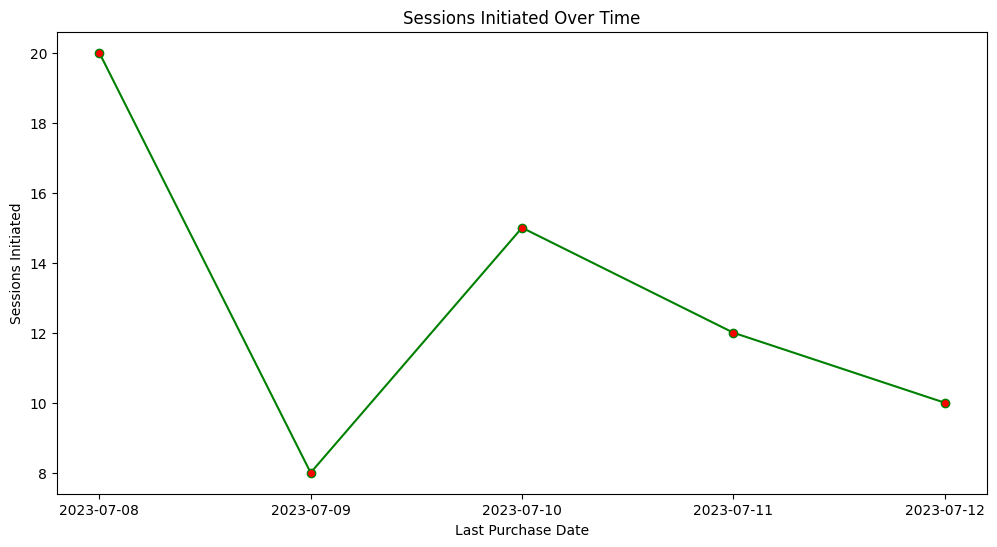

In [ ]:
# Sort the data by "Last_Purchase" date
final_combined_data = final_combined_data.sort_values(by='Last_Purchase')

# Create a line plot
plt.figure(figsize=(12, 6))
plt.plot(final_combined_data['Last_Purchase'], final_combined_data['Sessions_Initiated'], marker='o', linestyle='-', color='green', markerfacecolor='red')
plt.xlabel('Last Purchase Date')
plt.ylabel('Sessions Initiated')
plt.title('Sessions Initiated Over Time')
# Format date labels on the x-axis
date_format = DateFormatter("%Y-%m-%d")
plt.gca().xaxis.set_major_formatter(date_format)

# Set the x-axis locator to show only distinct dates
plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=1))


plt.show()


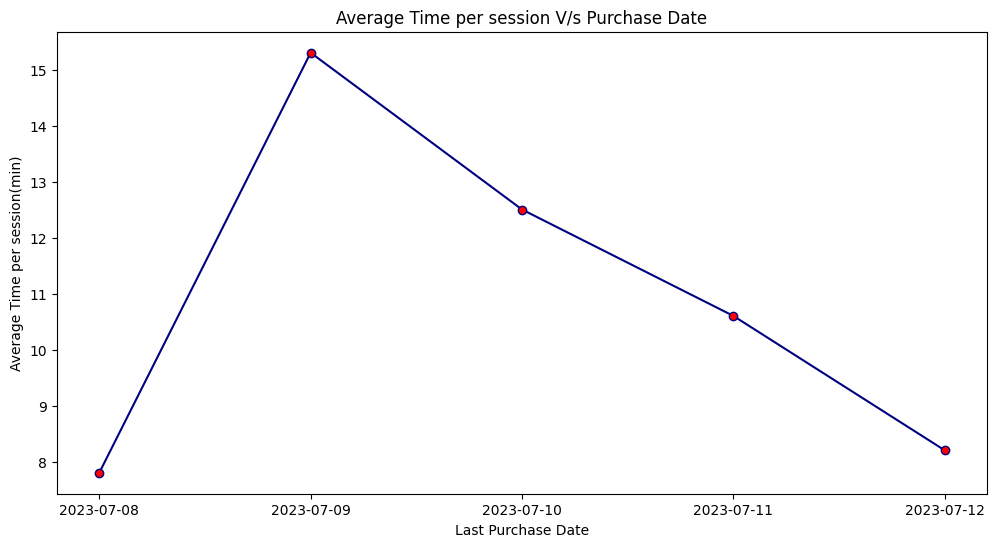

In [ ]:
# Create a line plot
plt.figure(figsize=(12, 6))
plt.plot(final_combined_data['Last_Purchase'], final_combined_data['Average_Time_per_Session(min)'], marker='o', linestyle='-', color='navy', markerfacecolor='red')
plt.xlabel('Last Purchase Date')
plt.ylabel('Average Time per session(min)')
plt.title('Average Time per session V/s Purchase Date')
# Format date labels on the x-axis
date_format = DateFormatter("%Y-%m-%d")
plt.gca().xaxis.set_major_formatter(date_format)

# Set the x-axis locator to show only distinct dates
plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=1))


plt.show()

In [ ]:
final_combined_data = final_combined_data.sort_values(by='User_ID')
final_combined_data.head()

,User_ID,Delivery_Address,Delivery_Frequency(times per week),Preferred_Delivery_Day,Sessions_Initiated,Average_Time_per_Session(min),Favorite_Recipes,Last_Purchase,Preferred_Category,Most_Requested_Recipes,Fav_most_req,Top_Recipes
0,1,"123 Main St, Toronto",2,Tuesday and Friday,15,12.5,"Quinoa Salad, Spring Pasta",2023-07-10,Salads,"Quinoa Salad, Caesar Salad","{'Quinoa Salad': 2, 'Spring Pasta': 1, 'Caesar...","{'Quinoa Salad': 2, 'Spring Pasta': 1, 'Caesar..."
1,2,"456 Maple Ave,Vancouver",3,"Monday, Wednesday, Friday",10,8.2,"BBQ Burger, Margherita Pizza",2023-07-12,Meats,"BBQ Burger, Teriyaki Chicken","{'BBQ Burger': 2, 'Margherita Pizza': 1, 'Teri...","{'BBQ Burger': 2, 'Margherita Pizza': 1, 'Teri..."
2,3,"789 Pine Rd,Montreal",1,Thursday,12,10.6,"Grilled Salmon,Tomato Soup",2023-07-11,Seafood,"Grilled Salmon, Shrimp Ceviche","{'Grilled Salmon,Tomato Soup': 1, 'Grilled Sal...","{'Grilled Salmon,Tomato Soup': 1, 'Grilled Sal..."
3,4,"101 Oak St, Calgary",2,Wednesday and Saturday,8,15.3,"Tofu Tacos, Fruit Smoothie",2023-07-09,Vegan,"Fruit Smoothie, Garbanzo Bowl","{'Tofu Tacos': 1, 'Fruit Smoothie': 2, 'Garban...","{'Fruit Smoothie': 2, 'Tofu Tacos': 1, 'Garban..."
4,5,"222 Elm St, Ottawa",4,"Monday, Tuesday, Thursday, Saturday",20,7.8,"Chicken Curry, Mushroom Risotto",2023-07-08,International Dishes,"Chicken Curry, Sushi Rolls","{'Chicken Curry': 2, 'Mushroom Risotto': 1, 'S...","{'Chicken Curry': 2, 'Mushroom Risotto': 1, 'S..."


# 3.Create charts, graphs, and visual representations highlighting the benefits of partnering with AutoBasket.

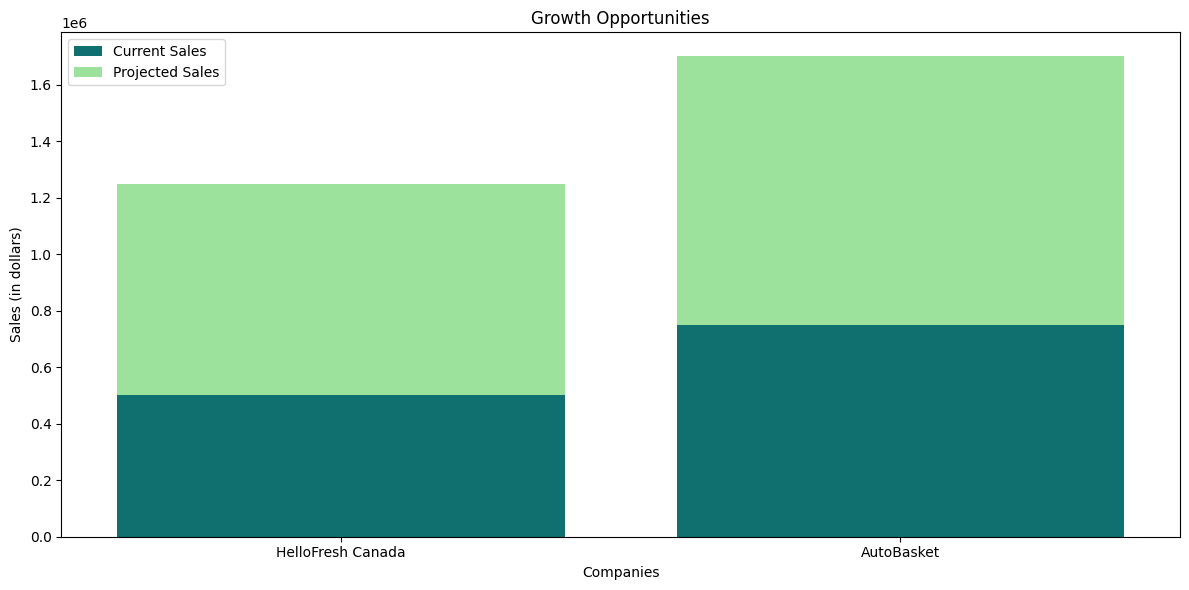

In [ ]:
# Data for current and projected sales
data = {
    "Company": ["HelloFresh Canada", "AutoBasket"],
    "Current Sales": [500000, 750000],
    "Projected Sales": [750000, 950000]
}

# Create a neat and tidy bar chart using Seaborn
plt.figure(figsize=(12, 6))

# Use the barplot function from Seaborn
sns.barplot(x="Company", y="Current Sales", data=data, color="teal", label="Current Sales")
sns.barplot(x="Company", y="Projected Sales", data=data, color="lightgreen", bottom=data["Current Sales"], label="Projected Sales")

plt.xlabel("Companies")
plt.ylabel("Sales (in dollars)")
plt.title("Growth Opportunities")
plt.legend()
plt.tight_layout()

plt.show()


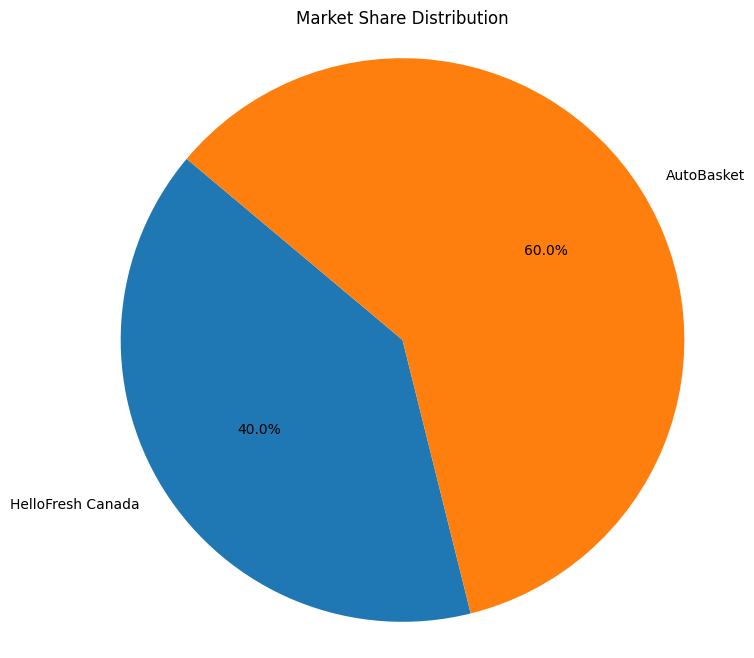

In [ ]:
market_share = [40, 60]  # Example percentages

# Create a pie chart
companies = ['HelloFresh Canada', 'AutoBasket']
plt.figure(figsize=(8, 8))
plt.pie(market_share, labels=companies, autopct='%1.1f%%', startangle=140)
plt.title('Market Share Distribution')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

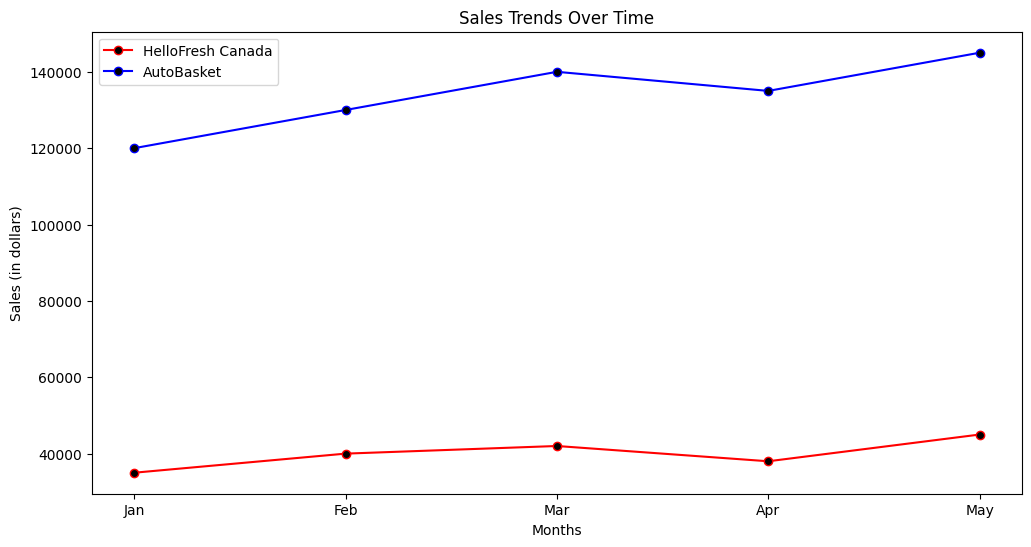

In [ ]:
# Sample data for sales trends over time
months = ['Jan', 'Feb', 'Mar', 'Apr', 'May']
autobasket_sales = [120000, 130000, 140000, 135000, 145000]  # Example data in dollars
hellofresh_sales = [35000, 40000, 42000, 38000, 45000]

# Create a line chart
plt.figure(figsize=(12, 6))
plt.plot(months, hellofresh_sales, label='HelloFresh Canada', marker='o',color='red', markerfacecolor='black')
plt.plot(months, autobasket_sales, label='AutoBasket', marker='o',color='blue', markerfacecolor='black')
plt.xlabel('Months')
plt.ylabel('Sales (in dollars)')
plt.title('Sales Trends Over Time')
plt.legend()
plt.show()

# Creating Function for web App

Function for Reading the dataset

In [6]:
def dataload():
    
    user_intrctn_df = pd.read_csv('/Users/krishnamenon/AIMT/WILP/Task 5/User_Interaction_Data.csv')
    #Removing extra space from column Average_Time_per_Session(min)
    user_intrctn_df.rename(columns = {'Average_Time_per_Session(min) ':'Average_Time_per_Session(min)'}, inplace = True)
    del_pref_df = pd.read_csv('/Users/krishnamenon/AIMT/WILP/Task 5/Delivery_Preferences.csv')
    rec_pref_df = pd.read_csv('/Users/krishnamenon/AIMT/WILP/Task 5/Recipe_Preferences.csv')
    #Removing extra space from column Preferred_Category
    rec_pref_df.rename(columns = {'Preferred_Category ':'Preferred_Category'}, inplace = True)
    return user_intrctn_df,del_pref_df,rec_pref_df

Function call for dataload

In [8]:
user_intrctn_df,del_pref_df,rec_pref_df = dataload()

Function for insights

In [9]:
def cal_insights(user_intrctn_df,del_pref_df,rec_pref_df):
    average_sessions_initiated = user_intrctn_df['Sessions_Initiated'].mean()
    average_session_duration = user_intrctn_df['Average_Time_per_Session(min)'].mean()
    favorite_recipes = user_intrctn_df['Favorite_Recipes'].str.split(', ').explode().value_counts()
    last_purchase_dates = pd.to_datetime(user_intrctn_df['Last_Purchase'])
    latest_purchase_date = last_purchase_dates.max()
    average_delivery_frequency = del_pref_df['Delivery_Frequency'].str.extract('(\d+)').astype(float).mean()
    preferred_delivery = del_pref_df['Preferred_Delivery_Day'].replace(", ", "and").str.split('and').explode()
    preferred_delivery_days = preferred_delivery.str.replace(',', '').str.split().explode().value_counts()
    preferred_recipe_categories = rec_pref_df['Preferred_Category'].value_counts()
    most_requested_recipes = rec_pref_df['Most_Requested_Recipes'].str.split(', ').explode().value_counts()
    print("User Interaction Data:")
    print(f"Average Sessions Initiated: {average_sessions_initiated}")
    print(f"Average Session Duration (min): {average_session_duration}")
    print("\nFavorite Recipes:")
    print(favorite_recipes)
    print("\nLast Purchase:")
    print(f"Latest Purchase Date: {latest_purchase_date}")

    print("\nDelivery Preferences:")
    print(f"Average Delivery Frequency: {average_delivery_frequency[0]}")
    print("\nPreferred Delivery Days:")
    print(preferred_delivery_days)

    print("\nRecipe Preferences:")
    print("Preferred Recipe Categories:")
    print(preferred_recipe_categories)
    print("\nMost Requested Recipes:")
    print(most_requested_recipes)
  #return average_sessions_initiated,average_session_duration,favorite_recipes,latest_purchase_date,average_delivery_frequency,preferred_delivery_days,preferred_recipe_categories,most_requested_recipes

Function Call for the Insights Data

In [10]:
cal_insights(user_intrctn_df,del_pref_df,rec_pref_df)

User Interaction Data:
Average Sessions Initiated: 13.0
Average Session Duration (min): 10.879999999999999

Favorite Recipes:
Quinoa Salad                  1
Spring Pasta                  1
BBQ Burger                    1
Margherita Pizza              1
Grilled Salmon,Tomato Soup    1
Tofu Tacos                    1
Fruit Smoothie                1
Chicken Curry                 1
Mushroom Risotto              1
Name: Favorite_Recipes, dtype: int64

Last Purchase:
Latest Purchase Date: 2023-07-12 00:00:00

Delivery Preferences:
Average Delivery Frequency: 2.4

Preferred Delivery Days:
Tuesday      2
Friday       2
Monday       2
Wednesday    2
Thursday     2
Saturday     2
Name: Preferred_Delivery_Day, dtype: int64

Recipe Preferences:
Preferred Recipe Categories:
Salads                  1
Meats                   1
Seafood                 1
Vegan                   1
International Dishes    1
Name: Preferred_Category, dtype: int64

Most Requested Recipes:
Quinoa Salad        1
Caesar Sala

Function for combining the data

In [11]:
def combine(user_intrctn_df,del_pref_df,rec_pref_df):
    combined_data = del_pref_df.merge(user_intrctn_df, left_on='User_ID', right_on='User_ID')
    final_combined_data = combined_data.merge(rec_pref_df, left_on='User_ID', right_on='User_ID')
    return final_combined_data

Function call for combining the dataset

In [12]:
final_combined_data = combine(user_intrctn_df,del_pref_df,rec_pref_df)

Function for Visualisation

In [15]:
def visualisation(final_combined_data):

  #**********************UserID v/s Sessions_Initiated**********************
    colors = ['skyblue', 'lightcoral', 'lightgreen', 'lightyellow', 'lightsalmon']
    user_ids = final_combined_data['User_ID']
    average_sessions = final_combined_data['Sessions_Initiated']
    plt.figure(figsize=(12, 6))
    bars = plt.bar(user_ids, average_sessions, color=colors)
    plt.xlabel('User ID')
    plt.ylabel('Average Sessions Initiated')
    plt.title('User Engagement')
    for bar, value in zip(bars, average_sessions):
        plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), f'{value:.2f}', ha='center', va='bottom')
    plt.show()

    # **********************UserID v/s Average_Time_per_Session(min)**********************
    colors = ['navy', 'pink', 'teal', 'yellow', 'lightgreen']
    user_ids = final_combined_data['User_ID']
    average_time = final_combined_data['Average_Time_per_Session(min)']
    plt.figure(figsize=(12, 6))
    bars = plt.bar(user_ids, average_time, color=colors)
    plt.xlabel('User ID')
    plt.ylabel('Average Time Per Session')
    plt.title('Average Time per Session by Users')
    for bar, value in zip(bars, average_sessions):
        plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), f'{value:.2f}', ha='center', va='bottom')
    plt.show()


    # **********************Average Time per Session by Users**********************
    plt.figure(figsize=(12, 6))
    ax = sns.barplot(x=final_combined_data['User_ID'], y=final_combined_data['Average_Time_per_Session(min)'], palette='husl')
    plt.xlabel('User ID')
    plt.ylabel('Average Time per Session (min)')
    plt.title('Average Time per Session by Users')
    # Add values on the bars
    for p in ax.patches:
        ax.annotate(f'{p.get_height():.2f}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='baseline')
    plt.show()

    #**********************Preferred Delivery Day Distribution**********************
    preferred_delivery = del_pref_df['Preferred_Delivery_Day'].replace(", ", "and").str.split('and').explode()
    preferred_delivery_days = preferred_delivery.str.replace(',', '').str.split().explode().value_counts()
    pref_del_dy= pd.DataFrame({'Days':preferred_delivery_days.index, 'count':preferred_delivery_days.values})
    plt.figure(figsize=(12, 6))
    ax = sns.barplot( x=pref_del_dy['Days'],y = pref_del_dy['count'], palette='deep')
    plt.xlabel('Preferred Delivery Day')
    plt.ylabel('Count')
    plt.title('Preferred Delivery Day Distribution')
    for p in ax.patches:
        ax.annotate(f'{p.get_height():.2f}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='baseline')
    plt.show()

    #**********************Countplot Preferred Category**********************
    plt.figure(figsize=(12, 6))
    ax = sns.countplot( data=final_combined_data,x='Preferred_Category', palette='colorblind')
    plt.xlabel('Preferred Category')
    plt.ylabel('Number of Users')
    plt.title('Preferred Category Distribution')
    for p in ax.patches:
        ax.annotate(f'{p.get_height():.2f}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='baseline')
    plt.show()

    #**********************Piechart Preferred Category**********************
    category_counts = final_combined_data['Preferred_Category'].value_counts()
    plt.figure(figsize=(8, 8))
    plt.pie(category_counts, labels=category_counts.index, autopct='%1.1f%%')
    plt.title('Preferred Recipe Categories')
    plt.show()

    #**********************Scatter plot Relationship between Sessions Initiated and Average Time per Session**********************
    colors = sns.color_palette("muted", as_cmap=True)
    point_size = 100
    text_offset = (0, 0.15)  # Offset for text labels
    plt.figure(figsize=(12, 6))
    ax = sns.scatterplot(data=final_combined_data, x='Sessions_Initiated', y='Average_Time_per_Session(min)', hue='User_ID', palette=colors, s=point_size)
    plt.xlabel('Sessions Initiated')
    plt.ylabel('Average Time per Session (min)')
    plt.title('Relationship between Sessions Initiated and Average Time per Session')
    for line in range(0, final_combined_data.shape[0]):
        ax.text(final_combined_data['Sessions_Initiated'][line] + text_offset[0], final_combined_data['Average_Time_per_Session(min)'][line] + text_offset[1], f'{final_combined_data["User_ID"][line]}', horizontalalignment='left', size='medium', color='black')
    plt.show()

    final_combined_data.rename(columns = {'Delivery_Frequency':'Delivery_Frequency(times per week)'}, inplace = True)
    final_combined_data['Delivery_Frequency(times per week)']=final_combined_data['Delivery_Frequency(times per week)'].str.replace('times per week', '')

    #**********************Distribution of delivery frequency**********************
    plt.figure(figsize=(12, 6))
    sns.histplot(data=final_combined_data, x='Delivery_Frequency(times per week)', bins=10,  color='teal', edgecolor='black')
    plt.xlabel('Delivery Frequency (times per week)')
    plt.ylabel('Count')
    plt.title('Distribution of Delivery Frequency')
    plt.show()

    #**********************Word Cloud of Favorite and Most Requested Recipes**********************
    # Combine all the favorite recipes into a single string
    favorite_recipes_text = ','.join(final_combined_data['Favorite_Recipes'])
    favorite_most_text = ','.join(final_combined_data['Most_Requested_Recipes'])
    favorite_most_recipes_text = favorite_recipes_text+','+favorite_most_text
    # Generate a word cloud
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(favorite_most_recipes_text)
    plt.figure(figsize=(10, 6))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title('Word Cloud of Favorite and Most Requested Recipes')
    plt.show()

    #**********************Top Recipes from favourite and most requested recipes**********************
    favorite_most_text = ','.join(final_combined_data['Most_Requested_Recipes'])
    favorite_most_recipes_text = favorite_recipes_text+','+favorite_most_text
    final_combined_data['Fav_most_req'] = final_combined_data['Favorite_Recipes'] + ', ' + final_combined_data['Most_Requested_Recipes']
    # Create a function to count the occurrences of each recipe
    def count_recipes(recipe_list):
        recipe_count = {}
        recipes = recipe_list.split(', ')
        for recipe in recipes:
            if recipe in recipe_count:
                recipe_count[recipe] += 1
            else:
                recipe_count[recipe] = 1
        return recipe_count
    # Apply the count_recipes function to the Fav_most_req column
    final_combined_data['Fav_most_req'] = final_combined_data['Fav_most_req'].apply(count_recipes)
    # Function to extract and sort the most common recipes from the dictionaries
    def get_top_recipes(recipe_count_dict, top_n=5):
        sorted_recipes = sorted(recipe_count_dict.items(), key=lambda x: x[1], reverse=True)
        return dict(sorted_recipes[:top_n])
    # Get the top 5 recipes for each row
    final_combined_data['Top_Recipes'] = final_combined_data['Fav_most_req'].apply(get_top_recipes)
    # Count the total occurrences of the top recipes
    top_recipe_counts = {}
    for top_recipes in final_combined_data['Top_Recipes']:
        for recipe, count in top_recipes.items():
            if recipe in top_recipe_counts:
                top_recipe_counts[recipe] += count
            else:
                top_recipe_counts[recipe] = count
    # Sort the recipes by total occurrence count
    sorted_top_recipe_counts = dict(sorted(top_recipe_counts.items(), key=lambda x: x[1], reverse=True))
    # Create a bar chart for the top recipes
    plt.figure(figsize=(12, 6))
    sns.barplot(x=list(sorted_top_recipe_counts.keys()), y=list(sorted_top_recipe_counts.values()), palette='Set2')
    plt.xlabel('Recipe')
    plt.ylabel('Count')
    plt.title('Top Recipes from favourite and most requested recipes')
    plt.xticks(rotation=45, ha='right')
    plt.show()

    #**********************Distribution of Recipe Counts**********************
    recipe_counts_list = final_combined_data['Fav_most_req'].apply(lambda x: [x]).explode()
    # Convert the list of dictionaries to a DataFrame
    recipe_counts_df = pd.DataFrame(recipe_counts_list.tolist())
    # Fill missing values with 0 (recipes that don't appear for a user)
    recipe_counts_df = recipe_counts_df.fillna(0)
    # Sum the counts for each recipe to get the total count
    recipe_counts_df = recipe_counts_df.groupby(level=0).sum()
    # Reset the index to have a default integer index
    recipe_counts_df = recipe_counts_df.reset_index()
    # Transpose the DataFrame
    recipe_counts_transposed = recipe_counts_df.set_index('index').T.reset_index()
    # Rename the columns
    recipe_counts_transposed.columns = ['Recipe'] + list(range(len(recipe_counts_transposed.columns) - 1))
    # Reset the index
    recipe_counts_transposed = recipe_counts_transposed.reset_index(drop=True)
    # Sum the values in each row and create a new column
    recipe_counts_transposed['Sum'] = recipe_counts_transposed.iloc[:, 1:].sum(axis=1).astype(int)
    # Drop the individual recipe count columns
    recipe_counts_transposed = recipe_counts_transposed.drop(recipe_counts_transposed.columns[1:-1], axis=1)
    # Data for the pie chart
    labels = recipe_counts_transposed['Recipe']
    sizes = recipe_counts_transposed['Sum']
    # Create a pie chart
    plt.figure(figsize=(8, 8))
    plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140)
    plt.axis('equal')
    plt.title('Distribution of Recipe Counts')
    plt.show()

    #**********************Sessions Initiated Over Time**********************
    # Convert "Last_Purchase" to a datetime format
    final_combined_data['Last_Purchase'] = pd.to_datetime(final_combined_data['Last_Purchase'])
    # Sort the data by "Last_Purchase" date
    final_combined_data = final_combined_data.sort_values(by='Last_Purchase')
    # Create a line plot
    plt.figure(figsize=(12, 6))
    plt.plot(final_combined_data['Last_Purchase'], final_combined_data['Sessions_Initiated'], marker='o', linestyle='-', color='green', markerfacecolor='red')
    plt.xlabel('Last Purchase Date')
    plt.ylabel('Sessions Initiated')
    plt.title('Sessions Initiated Over Time')
    # Format date labels on the x-axis
    date_format = DateFormatter("%Y-%m-%d")
    plt.gca().xaxis.set_major_formatter(date_format)
    # Set the x-axis locator to show only distinct dates
    plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=1))
    plt.show()

    #**********************Average Time per session V/s Purchase Date**********************
    # Create a line plot
    plt.figure(figsize=(12, 6))
    plt.plot(final_combined_data['Last_Purchase'], final_combined_data['Average_Time_per_Session(min)'], marker='o', linestyle='-', color='navy', markerfacecolor='red')
    plt.xlabel('Last Purchase Date')
    plt.ylabel('Average Time per session(min)')
    plt.title('Average Time per session V/s Purchase Date')
    # Format date labels on the x-axis
    date_format = DateFormatter("%Y-%m-%d")
    plt.gca().xaxis.set_major_formatter(date_format)
    # Set the x-axis locator to show only distinct dates
    plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=1))
    plt.show()

    final_combined_data = final_combined_data.sort_values(by='User_ID')

    #********************************************AUTOBASKET V/S HELLOWFRESH CANADA********************************************

    #**********************Growth Opportunities**********************
    # Data for current and projected sales
    data = {
      "Company": ["HelloFresh Canada", "AutoBasket"],
      "Current Sales": [500000, 750000],
      "Projected Sales": [750000, 950000]
    }
    # Create a neat and tidy bar chart using Seaborn
    plt.figure(figsize=(12, 6))
    # Use the barplot function from Seaborn
    sns.barplot(x="Company", y="Current Sales", data=data, color="teal", label="Current Sales")
    sns.barplot(x="Company", y="Projected Sales", data=data, color="lightgreen", bottom=data["Current Sales"], label="Projected Sales")
    plt.xlabel("Companies")
    plt.ylabel("Sales (in dollars)")
    plt.title("Growth Opportunities")
    plt.legend()
    plt.tight_layout()
    plt.show()

    #**********************Market Share Distribution**********************
    market_share = [40, 60]  # Example percentages
    # Create a pie chart
    companies = ['HelloFresh Canada', 'AutoBasket']
    plt.figure(figsize=(8, 8))
    plt.pie(market_share, labels=companies, autopct='%1.1f%%', startangle=140)
    plt.title('Market Share Distribution')
    plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
    plt.show()

    #**********************Sales Trends Over Time**********************
    # Sample data for sales trends over time
    months = ['Jan', 'Feb', 'Mar', 'Apr', 'May']
    autobasket_sales = [120000, 130000, 140000, 135000, 145000]  # Example data in dollars
    hellofresh_sales = [35000, 40000, 42000, 38000, 45000]
    # Create a line chart
    plt.figure(figsize=(12, 6))
    plt.plot(months, hellofresh_sales, label='HelloFresh Canada', marker='o',color='red', markerfacecolor='black')
    plt.plot(months, autobasket_sales, label='AutoBasket', marker='o',color='blue', markerfacecolor='black')
    plt.xlabel('Months')
    plt.ylabel('Sales (in dollars)')
    plt.title('Sales Trends Over Time')
    plt.legend()
    plt.show()


Function call for visualisation

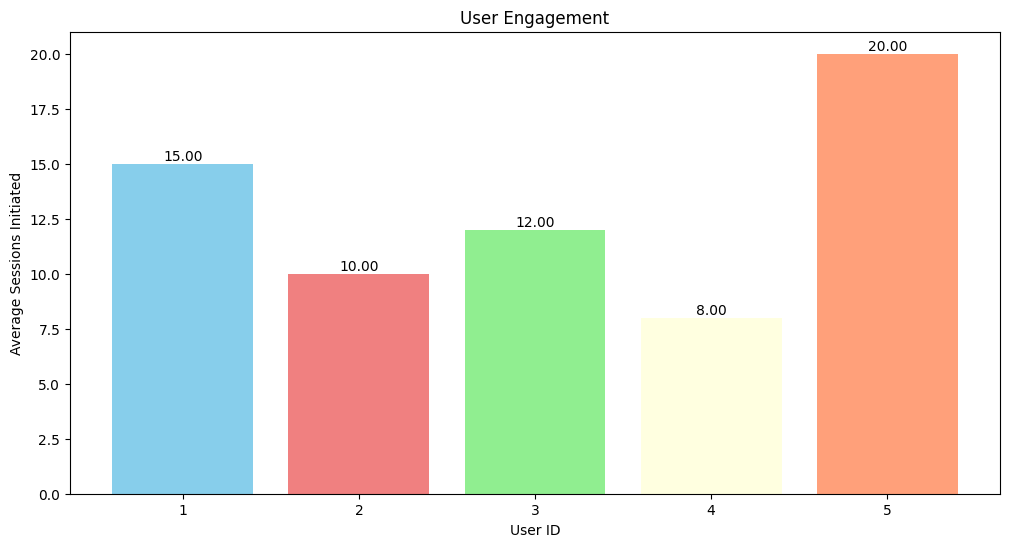

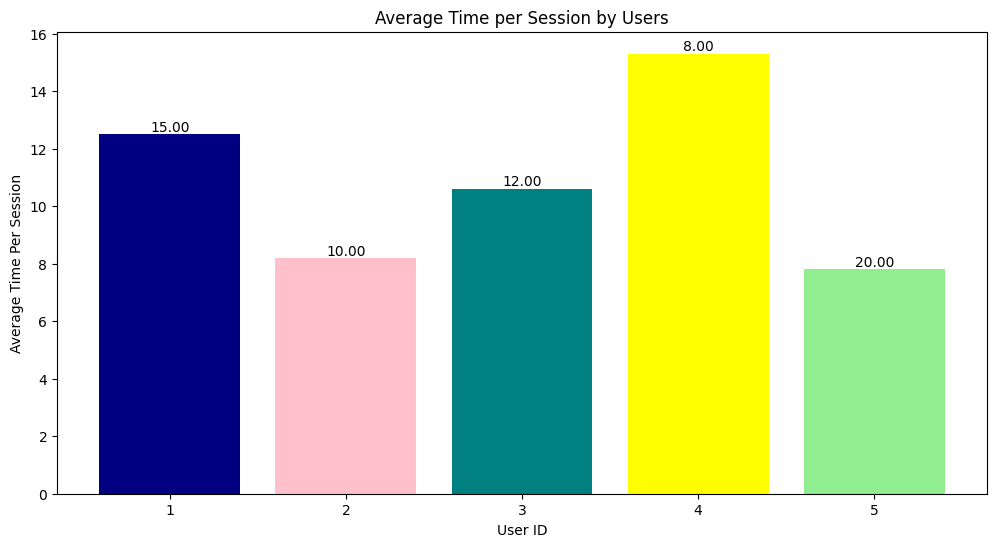

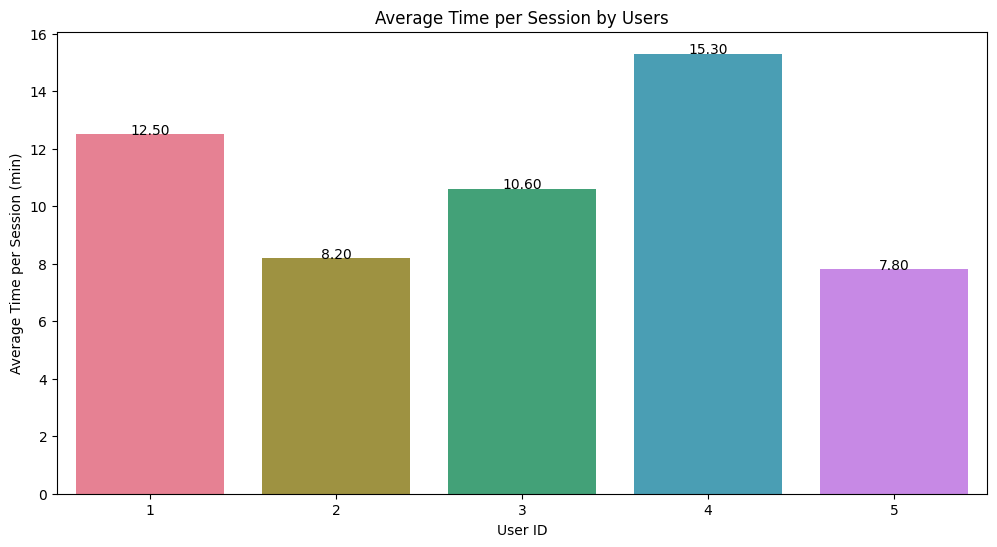

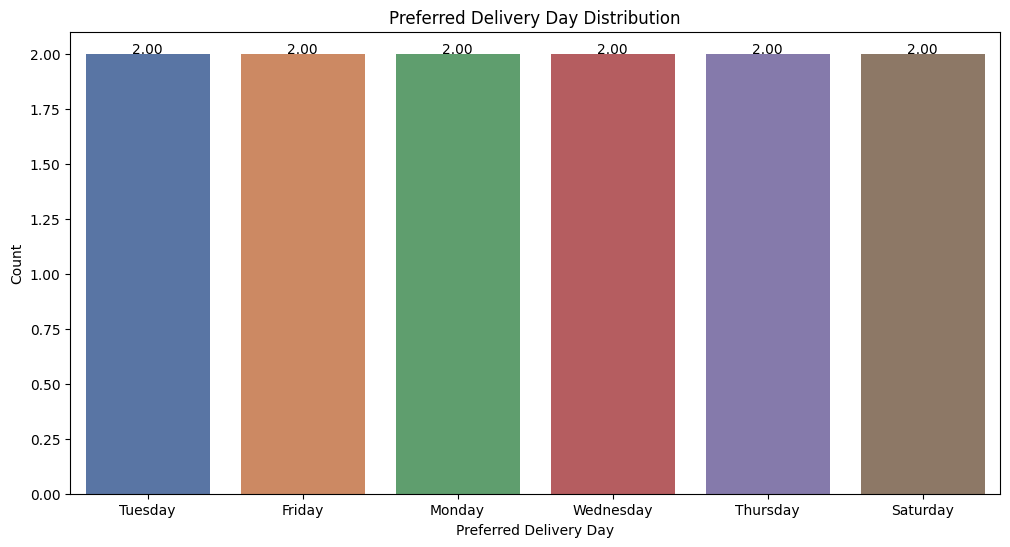

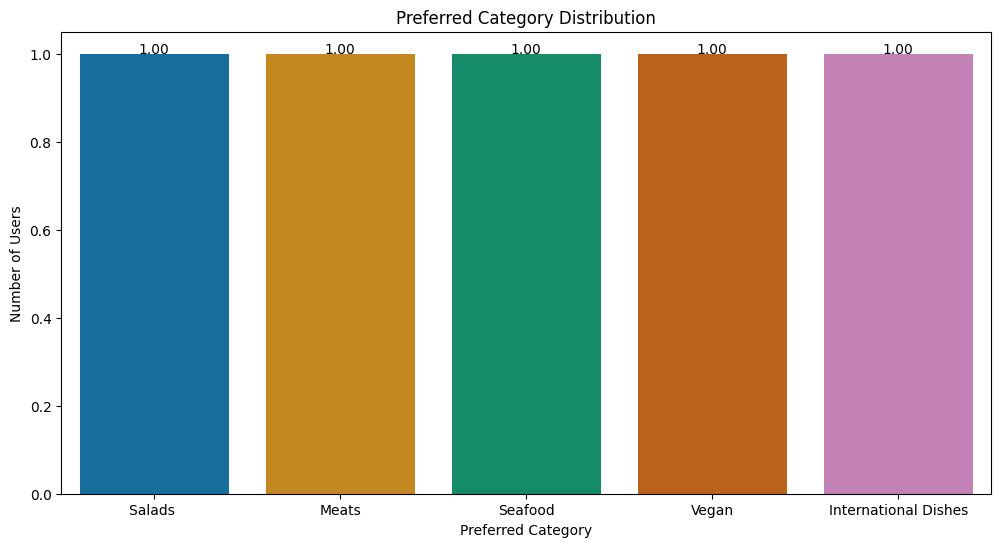

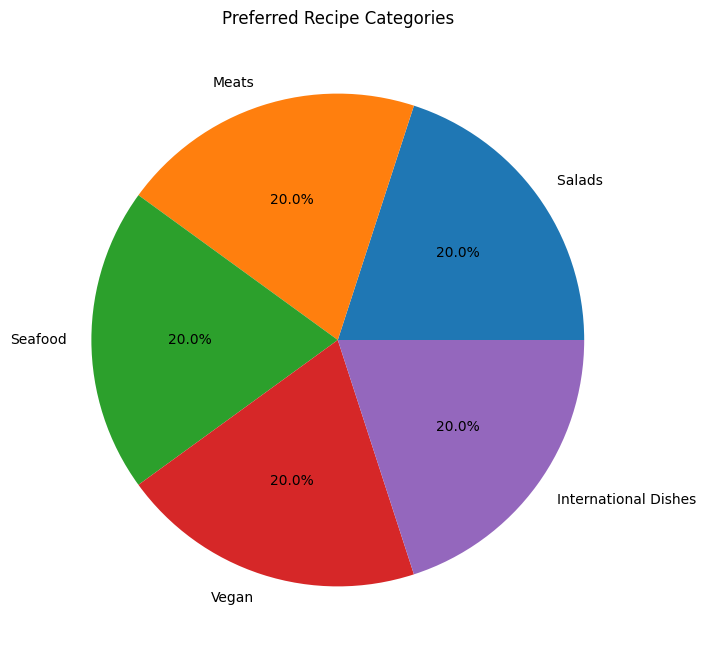

/Users/krishnamenon/myenv/lib/python3.7/site-packages/ipykernel_launcher.py:76: UserWarning: The palette list has more values (10) than needed (5), which may not be intended.


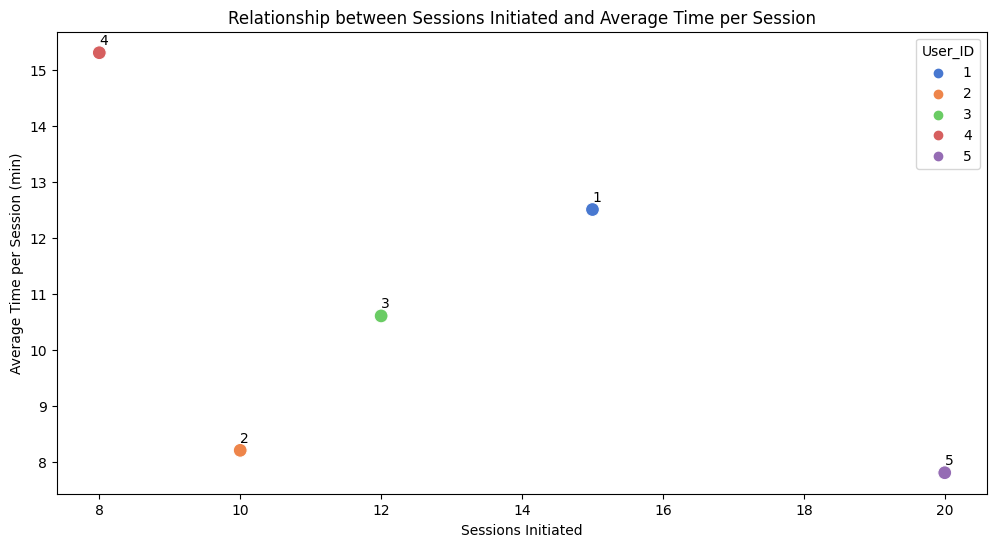

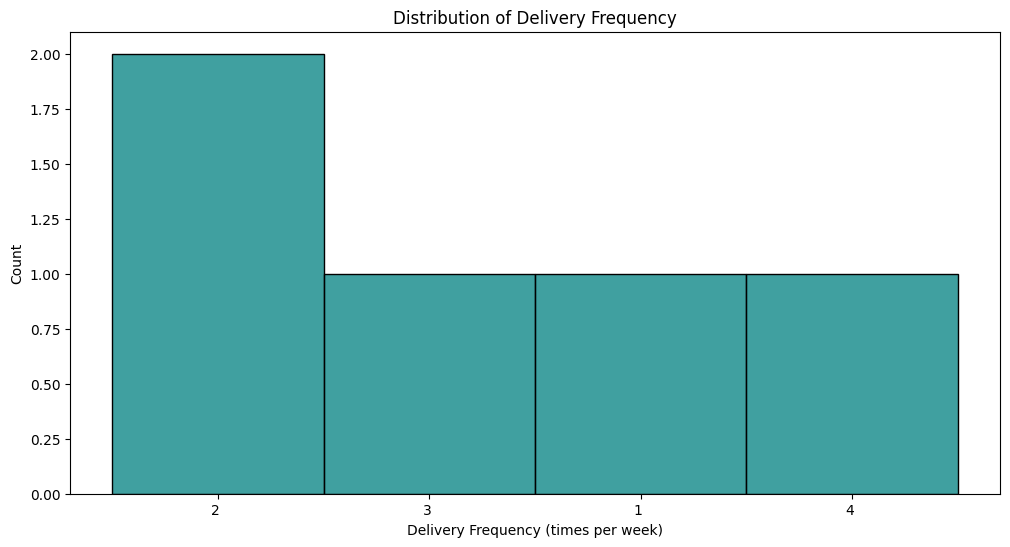

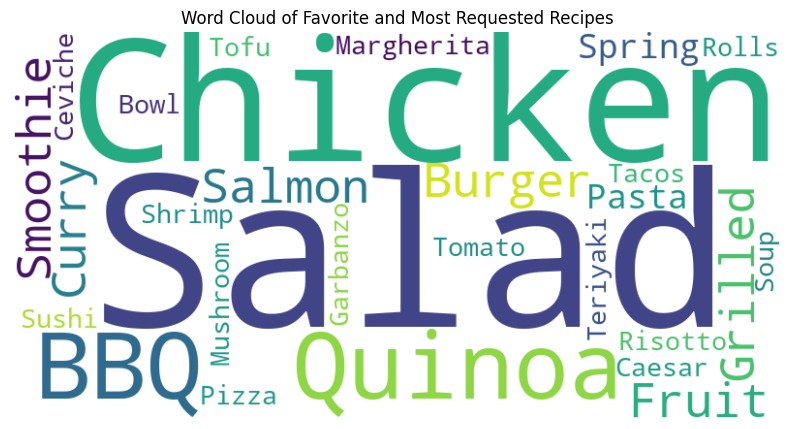

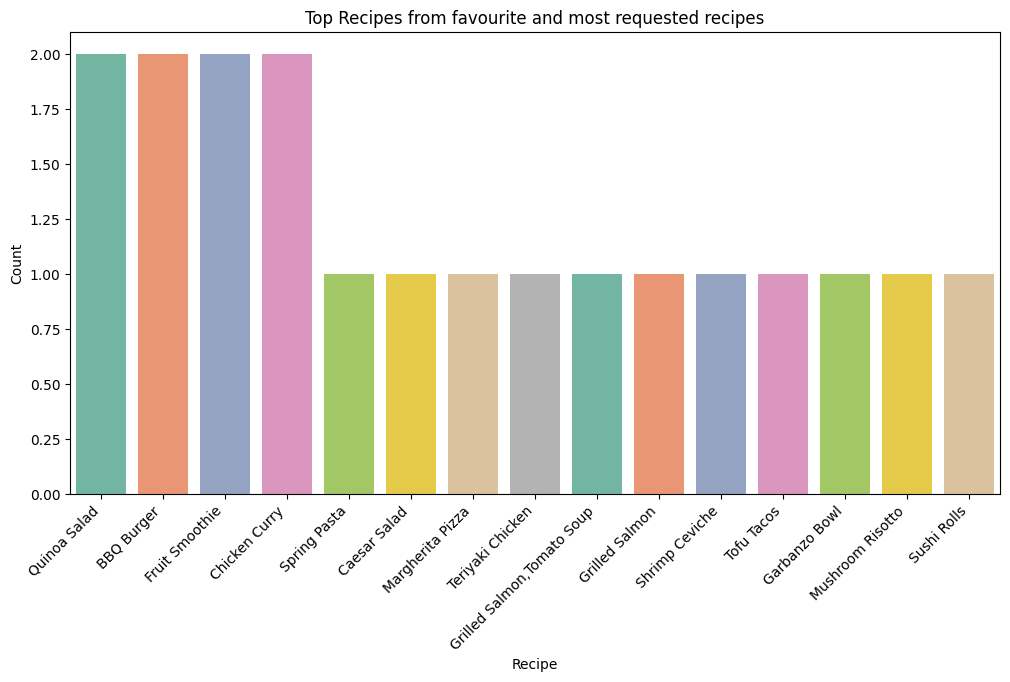

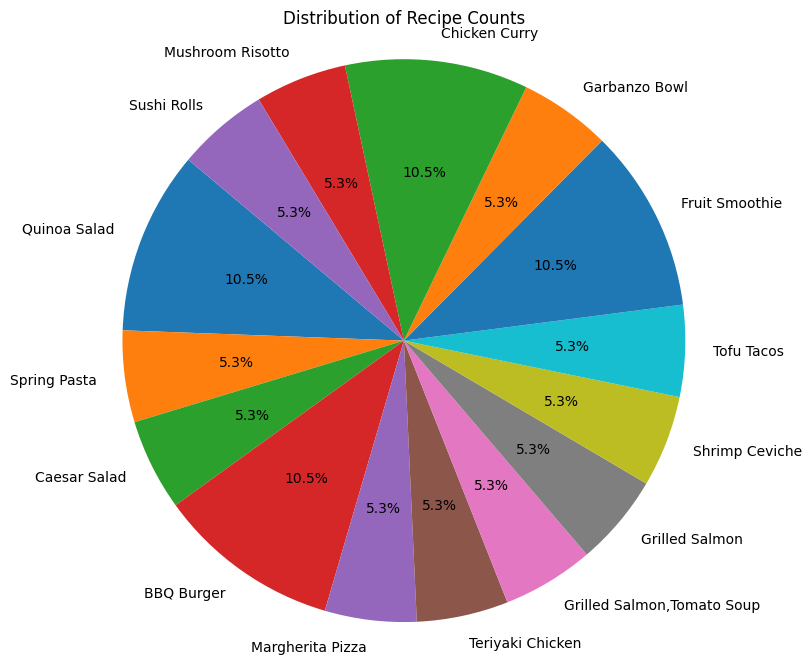

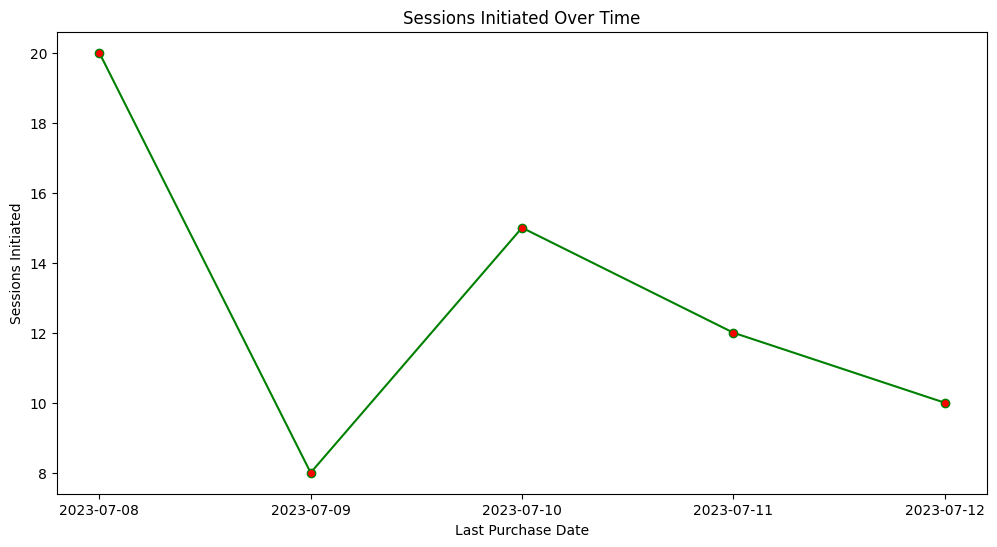

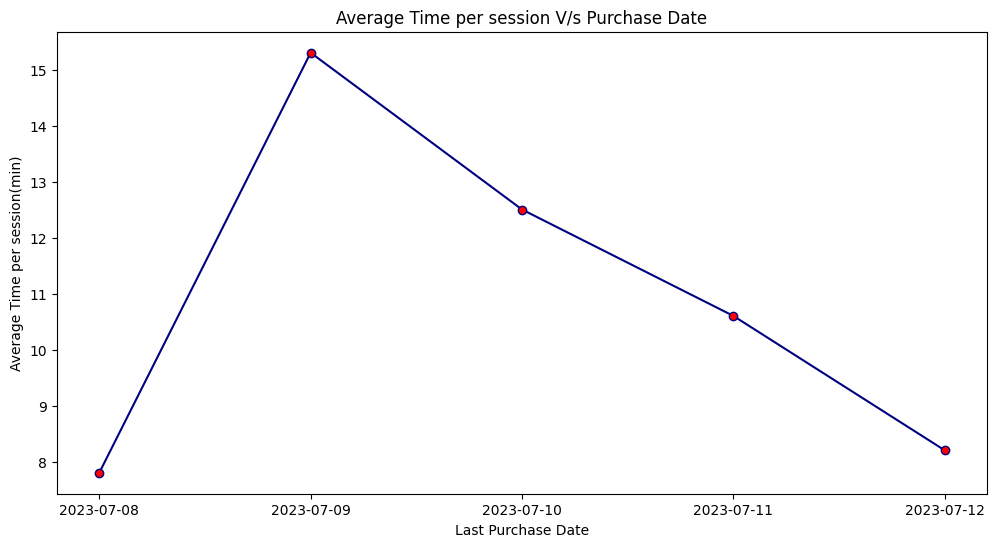

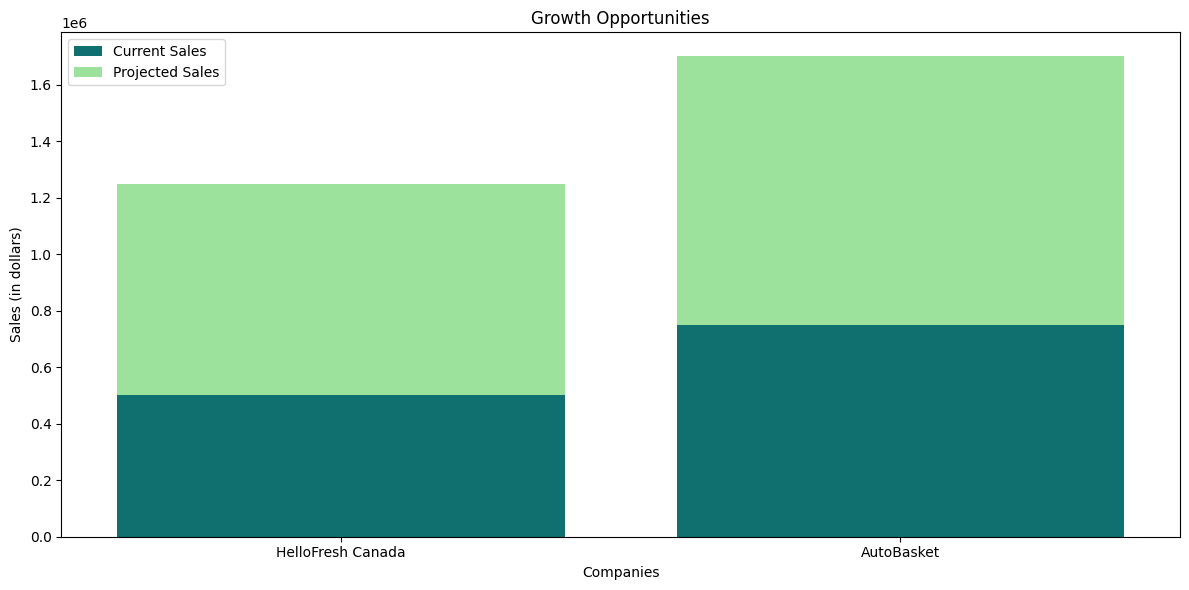

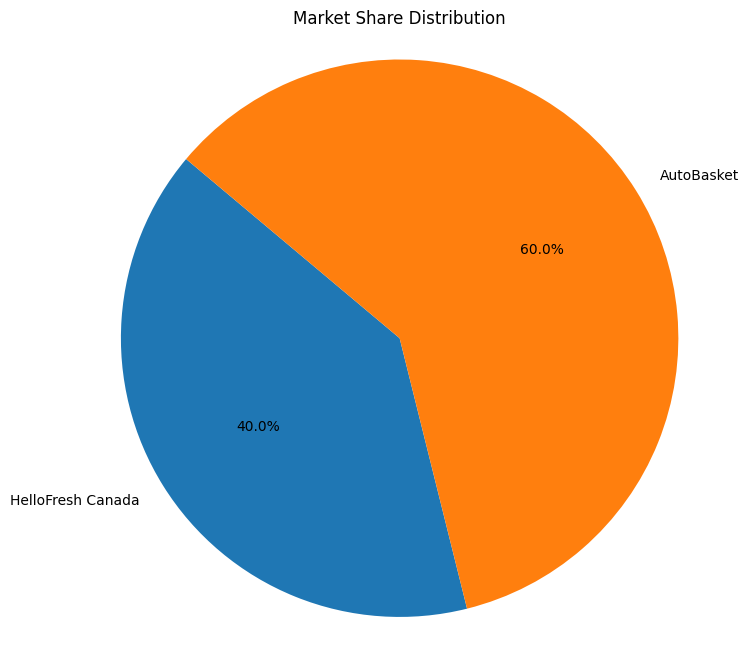

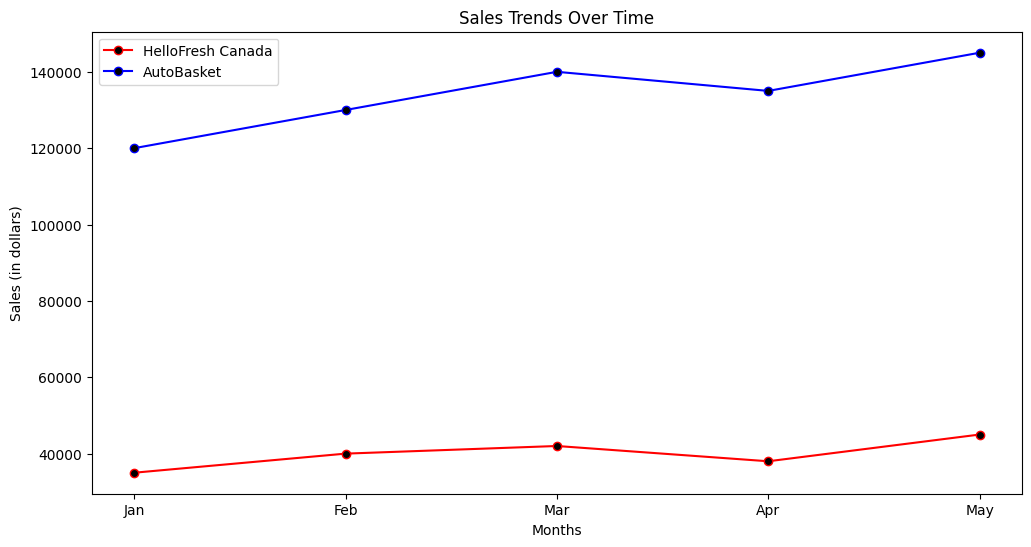

In [16]:
visualisation(final_combined_data)

In [17]:
def insights(user_intrctn_df, del_pref_df, rec_pref_df):
    def cal_insights(user_intrctn_df,del_pref_df,rec_pref_df):
        average_sessions_initiated = user_intrctn_df['Sessions_Initiated'].mean()
        average_session_duration = user_intrctn_df['Average_Time_per_Session(min)'].mean()
        favorite_recipes = user_intrctn_df['Favorite_Recipes'].str.split(', ').explode().value_counts()
        last_purchase_dates = pd.to_datetime(user_intrctn_df['Last_Purchase'])
        latest_purchase_date = last_purchase_dates.max()
        average_delivery_frequency = del_pref_df['Delivery_Frequency'].str.extract('(\d+)').astype(float).mean()
        preferred_delivery = del_pref_df['Preferred_Delivery_Day'].replace(", ", "and").str.split('and').explode()
        preferred_delivery_days = preferred_delivery.str.replace(',', '').str.split().explode().value_counts()
        preferred_recipe_categories = rec_pref_df['Preferred_Category'].value_counts()
        most_requested_recipes = rec_pref_df['Most_Requested_Recipes'].str.split(', ').explode().value_counts()
        print("User Interaction Data:")
        print(f"Average Sessions Initiated: {average_sessions_initiated}")
        print(f"Average Session Duration (min): {average_session_duration}")
        print("\nFavorite Recipes:")
        print(favorite_recipes)
        print("\nLast Purchase:")
        print(f"Latest Purchase Date: {latest_purchase_date}")

        print("\nDelivery Preferences:")
        print(f"Average Delivery Frequency: {average_delivery_frequency[0]}")
        print("\nPreferred Delivery Days:")
        print(preferred_delivery_days)

        print("\nRecipe Preferences:")
        print("Preferred Recipe Categories:")
        print(preferred_recipe_categories)
        print("\nMost Requested Recipes:")
        print(most_requested_recipes)
        return average_sessions_initiated,average_session_duration,favorite_recipes,latest_purchase_date,average_delivery_frequency,preferred_delivery_days,preferred_recipe_categories,most_requested_recipes
    average_sessions_initiated, average_session_duration, favorite_recipes, latest_purchase_date, average_delivery_frequency, preferred_delivery_days, preferred_recipe_categories, most_requested_recipes = cal_insights(user_intrctn_df, del_pref_df, rec_pref_df)

In [18]:
average_sessions_initiated,average_session_duration,favorite_recipes,latest_purchase_date,average_delivery_frequency,preferred_delivery_days,preferred_recipe_categories,most_requested_recipes=insights(user_intrctn_df, del_pref_df, rec_pref_df)

User Interaction Data:
Average Sessions Initiated: 13.0
Average Session Duration (min): 10.879999999999999

Favorite Recipes:
Quinoa Salad                  1
Spring Pasta                  1
BBQ Burger                    1
Margherita Pizza              1
Grilled Salmon,Tomato Soup    1
Tofu Tacos                    1
Fruit Smoothie                1
Chicken Curry                 1
Mushroom Risotto              1
Name: Favorite_Recipes, dtype: int64

Last Purchase:
Latest Purchase Date: 2023-07-12 00:00:00

Delivery Preferences:
Average Delivery Frequency: 2.4

Preferred Delivery Days:
Tuesday      2
Friday       2
Monday       2
Wednesday    2
Thursday     2
Saturday     2
Name: Preferred_Delivery_Day, dtype: int64

Recipe Preferences:
Preferred Recipe Categories:
Salads                  1
Meats                   1
Seafood                 1
Vegan                   1
International Dishes    1
Name: Preferred_Category, dtype: int64

Most Requested Recipes:
Quinoa Salad        1
Caesar Sala

TypeError: cannot unpack non-iterable NoneType object

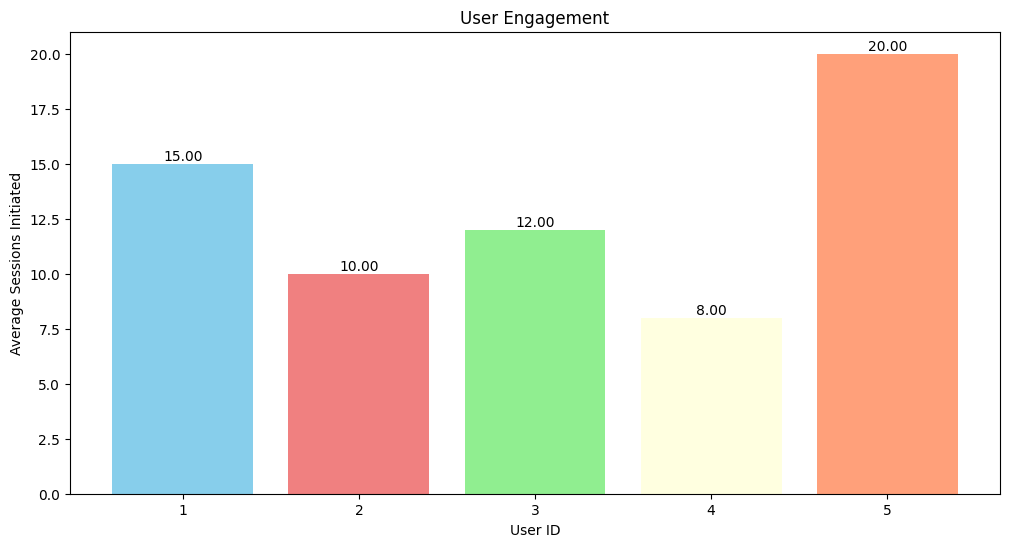

In [21]:
colors = ['skyblue', 'lightcoral', 'lightgreen', 'lightyellow', 'lightsalmon']
user_ids = final_combined_data['User_ID']
average_sessions = final_combined_data['Sessions_Initiated']
plt.figure(figsize=(12, 6))
bars = plt.bar(user_ids, average_sessions, color=colors)
plt.xlabel('User ID')
plt.ylabel('Average Sessions Initiated')
plt.title('User Engagement')
for bar, value in zip(bars, average_sessions):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), f'{value:.2f}', ha='center', va='bottom')
#plt.show()
plt.savefig('User_Engagement.png')

In [34]:
def visualizations():
    def visualisation(final_combined_data):

      #**********************UserID v/s Sessions_Initiated**********************
        colors = ['skyblue', 'lightcoral', 'lightgreen', 'lightyellow', 'lightsalmon']
        user_ids = final_combined_data['User_ID']
        average_sessions = final_combined_data['Sessions_Initiated']
        plt.figure(figsize=(12, 6))
        bars = plt.bar(user_ids, average_sessions, color=colors)
        plt.xlabel('User ID')
        plt.ylabel('Average Sessions Initiated')
        plt.title('User Engagement')
        for bar, value in zip(bars, average_sessions):
            plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), f'{value:.2f}', ha='center', va='bottom')
        #plt.show()
        plt.savefig('/Users/krishnamenon/AIMT/WILP/Task 5/Main/static/User_Engagement.png')

    
        # **********************Average Time per Session by Users**********************
        plt.figure(figsize=(12, 6))
        ax = sns.barplot(x=final_combined_data['User_ID'], y=final_combined_data['Average_Time_per_Session(min)'], palette='husl')
        plt.xlabel('User ID')
        plt.ylabel('Average Time per Session (min)')
        plt.title('Average Time per Session by Users')
        # Add values on the bars
        for p in ax.patches:
            ax.annotate(f'{p.get_height():.2f}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='baseline')
        #plt.show()
        plt.savefig('/Users/krishnamenon/AIMT/WILP/Task 5/Main/static/Average_Time_per_Session_by_Users.png')
    
        #**********************Preferred Delivery Day Distribution**********************
        preferred_delivery = del_pref_df['Preferred_Delivery_Day'].replace(", ", "and").str.split('and').explode()
        preferred_delivery_days = preferred_delivery.str.replace(',', '').str.split().explode().value_counts()
        pref_del_dy= pd.DataFrame({'Days':preferred_delivery_days.index, 'count':preferred_delivery_days.values})
        plt.figure(figsize=(12, 6))
        ax = sns.barplot( x=pref_del_dy['Days'],y = pref_del_dy['count'], palette='deep')
        plt.xlabel('Preferred Delivery Day')
        plt.ylabel('Count')
        plt.title('Preferred Delivery Day Distribution')
        for p in ax.patches:
            ax.annotate(f'{p.get_height():.2f}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='baseline')
        #plt.show()
        plt.savefig('/Users/krishnamenon/AIMT/WILP/Task 5/Main/static/Preferred_Delivery_Day_Distribution.png')
    
        #**********************Countplot Preferred Category**********************
        plt.figure(figsize=(12, 6))
        ax = sns.countplot( data=final_combined_data,x='Preferred_Category', palette='colorblind')
        plt.xlabel('Preferred Category')
        plt.ylabel('Number of Users')
        plt.title('Preferred Category Distribution')
        for p in ax.patches:
            ax.annotate(f'{p.get_height():.2f}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='baseline')
        #plt.show()
        plt.savefig('/Users/krishnamenon/AIMT/WILP/Task 5/Main/static/Preferred_Category_Distribution.png')
    
        #**********************Piechart Preferred Category**********************
        category_counts = final_combined_data['Preferred_Category'].value_counts()
        plt.figure(figsize=(8, 8))
        plt.pie(category_counts, labels=category_counts.index, autopct='%1.1f%%')
        plt.title('Preferred Recipe Categories')
        #plt.show()
        plt.savefig('/Users/krishnamenon/AIMT/WILP/Task 5/Main/static/Preferred_Recipe_Categories.png')
    
        #**********************Scatter plot Relationship between Sessions Initiated and Average Time per Session**********************
        colors = sns.color_palette("muted", as_cmap=True)
        point_size = 100
        text_offset = (0, 0.15)  # Offset for text labels
        plt.figure(figsize=(12, 6))
        ax = sns.scatterplot(data=final_combined_data, x='Sessions_Initiated', y='Average_Time_per_Session(min)', hue='User_ID', palette=colors, s=point_size)
        plt.xlabel('Sessions Initiated')
        plt.ylabel('Average Time per Session (min)')
        plt.title('Relationship between Sessions Initiated and Average Time per Session')
        for line in range(0, final_combined_data.shape[0]):
            ax.text(final_combined_data['Sessions_Initiated'][line] + text_offset[0], final_combined_data['Average_Time_per_Session(min)'][line] + text_offset[1], f'{final_combined_data["User_ID"][line]}', horizontalalignment='left', size='medium', color='black')
        #plt.show()
        plt.savefig('/Users/krishnamenon/AIMT/WILP/Task 5/Main/static/Relationship_between_Sessions_Initiated_and_Average_Time_per_Session.png')
    
        final_combined_data.rename(columns = {'Delivery_Frequency':'Delivery_Frequency(times per week)'}, inplace = True)
        final_combined_data['Delivery_Frequency(times per week)']=final_combined_data['Delivery_Frequency(times per week)'].str.replace('times per week', '')
    
        #**********************Distribution of delivery frequency**********************
        plt.figure(figsize=(12, 6))
        sns.histplot(data=final_combined_data, x='Delivery_Frequency(times per week)', bins=10,  color='teal', edgecolor='black')
        plt.xlabel('Delivery Frequency (times per week)')
        plt.ylabel('Count')
        plt.title('Distribution of Delivery Frequency')
        #plt.show()
        plt.savefig('/Users/krishnamenon/AIMT/WILP/Task 5/Main/static/Distribution_of_Delivery_Frequency.png')
    
        #**********************Word Cloud of Favorite and Most Requested Recipes**********************
        # Combine all the favorite recipes into a single string
        favorite_recipes_text = ','.join(final_combined_data['Favorite_Recipes'])
        favorite_most_text = ','.join(final_combined_data['Most_Requested_Recipes'])
        favorite_most_recipes_text = favorite_recipes_text+','+favorite_most_text
        # Generate a word cloud
        wordcloud = WordCloud(width=800, height=400, background_color='white').generate(favorite_most_recipes_text)
        plt.figure(figsize=(10, 6))
        plt.imshow(wordcloud, interpolation='bilinear')
        plt.axis('off')
        plt.title('Word Cloud of Favorite and Most Requested Recipes')
        #plt.show()
        plt.savefig('/Users/krishnamenon/AIMT/WILP/Task 5/Main/static/Word_cloud.png')
    
        #**********************Top Recipes from favourite and most requested recipes**********************
        favorite_most_text = ','.join(final_combined_data['Most_Requested_Recipes'])
        favorite_most_recipes_text = favorite_recipes_text+','+favorite_most_text
        final_combined_data['Fav_most_req'] = final_combined_data['Favorite_Recipes'] + ', ' + final_combined_data['Most_Requested_Recipes']
        # Create a function to count the occurrences of each recipe
        def count_recipes(recipe_list):
            recipe_count = {}
            recipes = recipe_list.split(', ')
            for recipe in recipes:
                if recipe in recipe_count:
                    recipe_count[recipe] += 1
                else:
                    recipe_count[recipe] = 1
            return recipe_count
        # Apply the count_recipes function to the Fav_most_req column
        final_combined_data['Fav_most_req'] = final_combined_data['Fav_most_req'].apply(count_recipes)
        # Function to extract and sort the most common recipes from the dictionaries
        def get_top_recipes(recipe_count_dict, top_n=5):
            sorted_recipes = sorted(recipe_count_dict.items(), key=lambda x: x[1], reverse=True)
            return dict(sorted_recipes[:top_n])
        # Get the top 5 recipes for each row
        final_combined_data['Top_Recipes'] = final_combined_data['Fav_most_req'].apply(get_top_recipes)
        # Count the total occurrences of the top recipes
        top_recipe_counts = {}
        for top_recipes in final_combined_data['Top_Recipes']:
            for recipe, count in top_recipes.items():
                if recipe in top_recipe_counts:
                    top_recipe_counts[recipe] += count
                else:
                    top_recipe_counts[recipe] = count
        # Sort the recipes by total occurrence count
        sorted_top_recipe_counts = dict(sorted(top_recipe_counts.items(), key=lambda x: x[1], reverse=True))
        # Create a bar chart for the top recipes
        plt.figure(figsize=(12, 6))
        sns.barplot(x=list(sorted_top_recipe_counts.keys()), y=list(sorted_top_recipe_counts.values()), palette='Set2')
        plt.xlabel('Recipe')
        plt.ylabel('Count')
        plt.title('Top Recipes from favourite and most requested recipes')
        plt.xticks(rotation=45, ha='right')
        #plt.show()
        plt.savefig('/Users/krishnamenon/AIMT/WILP/Task 5/Main/static/Top_Recipes_from_favourite_and_most_requested_recipes.png')
    
        #**********************Distribution of Recipe Counts**********************
        recipe_counts_list = final_combined_data['Fav_most_req'].apply(lambda x: [x]).explode()
        # Convert the list of dictionaries to a DataFrame
        recipe_counts_df = pd.DataFrame(recipe_counts_list.tolist())
        # Fill missing values with 0 (recipes that don't appear for a user)
        recipe_counts_df = recipe_counts_df.fillna(0)
        # Sum the counts for each recipe to get the total count
        recipe_counts_df = recipe_counts_df.groupby(level=0).sum()
        # Reset the index to have a default integer index
        recipe_counts_df = recipe_counts_df.reset_index()
        # Transpose the DataFrame
        recipe_counts_transposed = recipe_counts_df.set_index('index').T.reset_index()
        # Rename the columns
        recipe_counts_transposed.columns = ['Recipe'] + list(range(len(recipe_counts_transposed.columns) - 1))
        # Reset the index
        recipe_counts_transposed = recipe_counts_transposed.reset_index(drop=True)
        # Sum the values in each row and create a new column
        recipe_counts_transposed['Sum'] = recipe_counts_transposed.iloc[:, 1:].sum(axis=1).astype(int)
        # Drop the individual recipe count columns
        recipe_counts_transposed = recipe_counts_transposed.drop(recipe_counts_transposed.columns[1:-1], axis=1)
        # Data for the pie chart
        labels = recipe_counts_transposed['Recipe']
        sizes = recipe_counts_transposed['Sum']
        # Create a pie chart
        plt.figure(figsize=(8, 8))
        plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140)
        plt.axis('equal')
        plt.title('Distribution of Recipe Counts')
        #plt.show()
        plt.savefig('/Users/krishnamenon/AIMT/WILP/Task 5/Main/static/Distribution_of_Recipe_Counts.png')
    
        #**********************Sessions Initiated Over Time**********************
        # Convert "Last_Purchase" to a datetime format
        final_combined_data['Last_Purchase'] = pd.to_datetime(final_combined_data['Last_Purchase'])
        # Sort the data by "Last_Purchase" date
        final_combined_data = final_combined_data.sort_values(by='Last_Purchase')
        # Create a line plot
        plt.figure(figsize=(12, 6))
        plt.plot(final_combined_data['Last_Purchase'], final_combined_data['Sessions_Initiated'], marker='o', linestyle='-', color='green', markerfacecolor='red')
        plt.xlabel('Last Purchase Date')
        plt.ylabel('Sessions Initiated')
        plt.title('Sessions Initiated Over Time')
        # Format date labels on the x-axis
        date_format = DateFormatter("%Y-%m-%d")
        plt.gca().xaxis.set_major_formatter(date_format)
        # Set the x-axis locator to show only distinct dates
        plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=1))
        #plt.show()
        plt.savefig('/Users/krishnamenon/AIMT/WILP/Task 5/Main/static/Sessions_Initiated_Over_Time.png')
    
        #**********************Average Time per session V/s Purchase Date**********************
        # Create a line plot
        plt.figure(figsize=(12, 6))
        plt.plot(final_combined_data['Last_Purchase'], final_combined_data['Average_Time_per_Session(min)'], marker='o', linestyle='-', color='navy', markerfacecolor='red')
        plt.xlabel('Last Purchase Date')
        plt.ylabel('Average Time per session(min)')
        plt.title('Average Time per session V/s Purchase Date')
        # Format date labels on the x-axis
        date_format = DateFormatter("%Y-%m-%d")
        plt.gca().xaxis.set_major_formatter(date_format)
        # Set the x-axis locator to show only distinct dates
        plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=1))
        #plt.show()
        plt.savefig('/Users/krishnamenon/AIMT/WILP/Task 5/Main/static/Average_Time_per_session_Vs_Purchase_Date.png')
    
        final_combined_data = final_combined_data.sort_values(by='User_ID')

    visualisation(final_combined_data)



/Users/krishnamenon/AIMT/WILP/Task 5/Main/myenv/lib/python3.7/site-packages/ipykernel_launcher.py:69: UserWarning: The palette list has more values (10) than needed (5), which may not be intended.


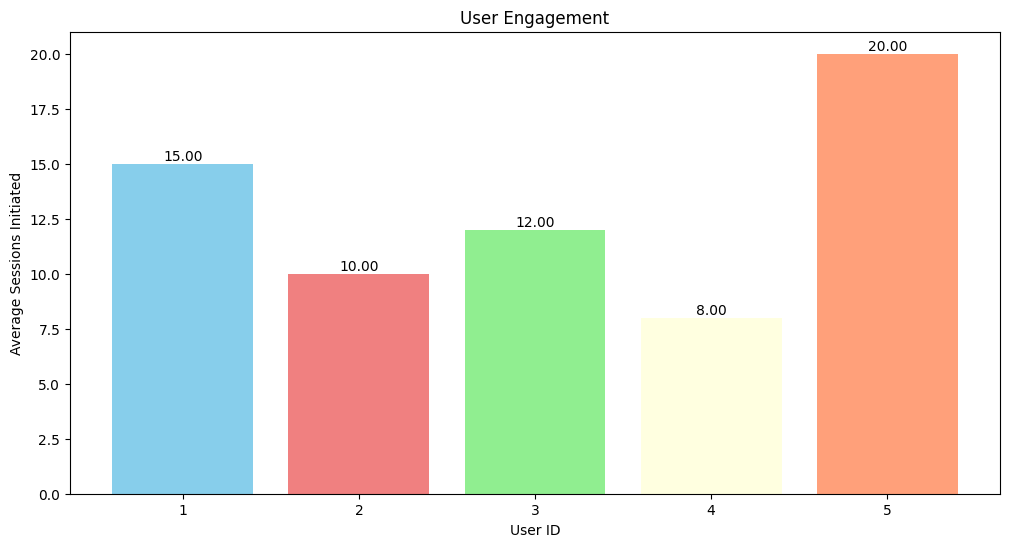

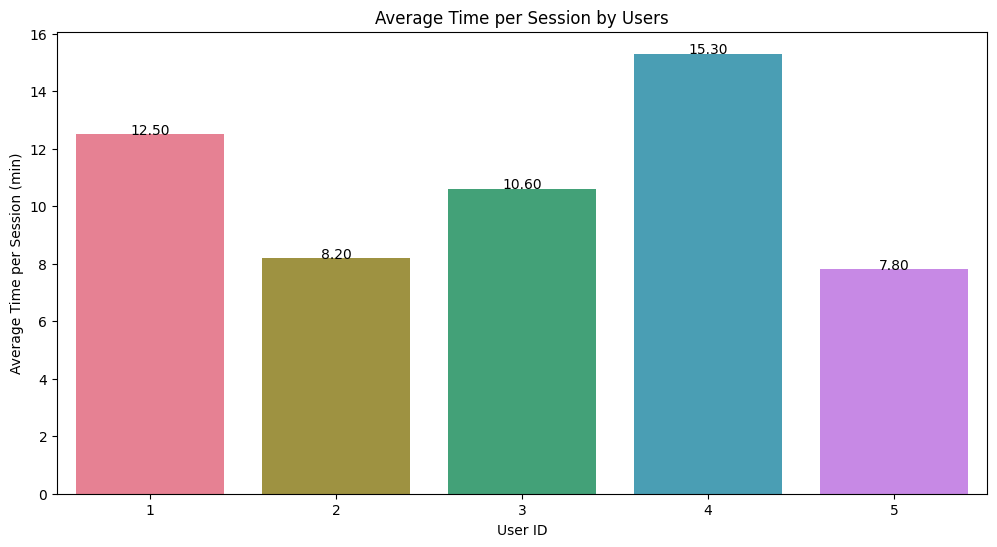

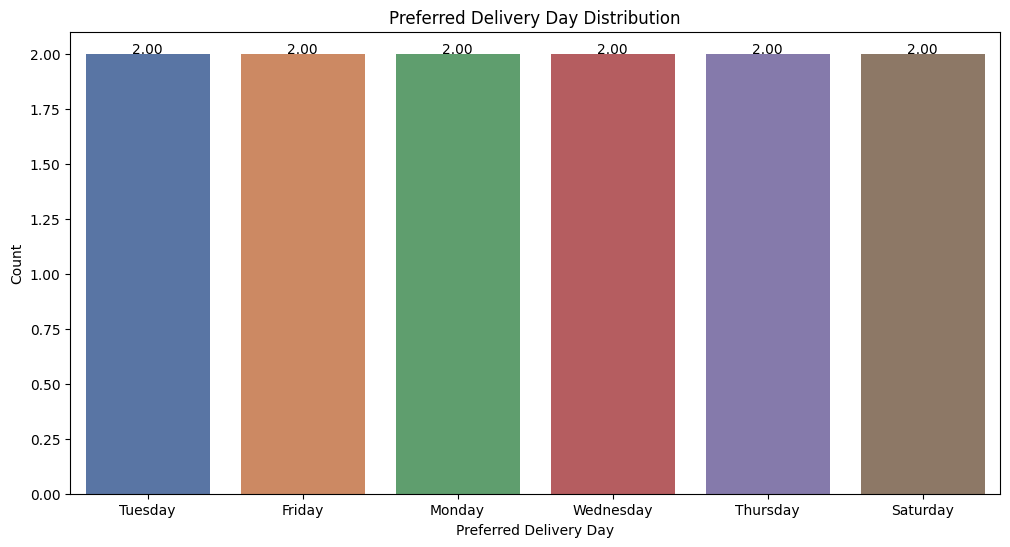

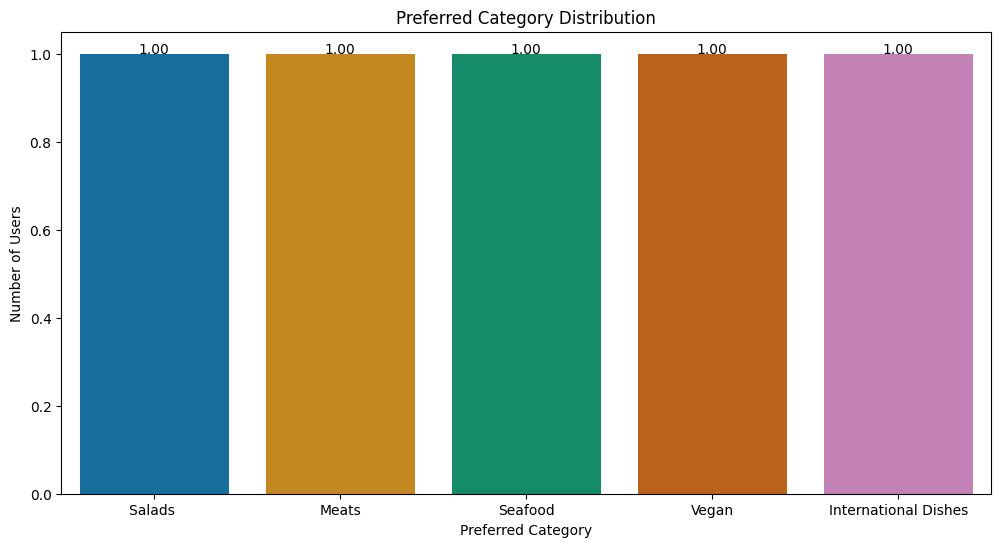

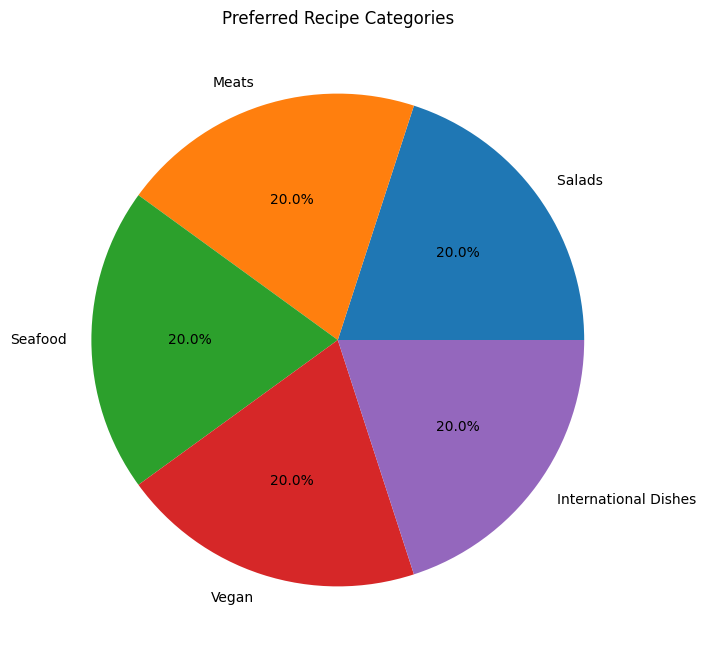

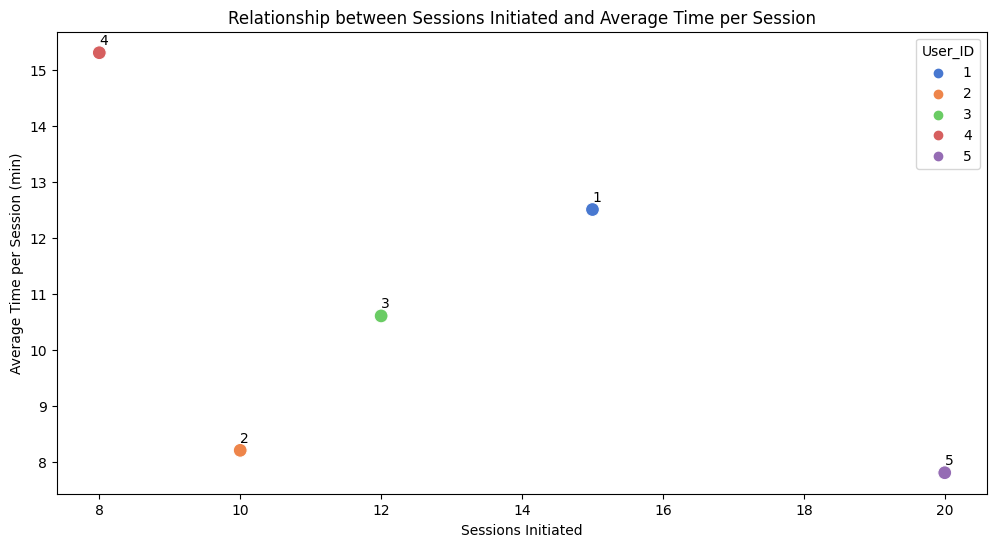

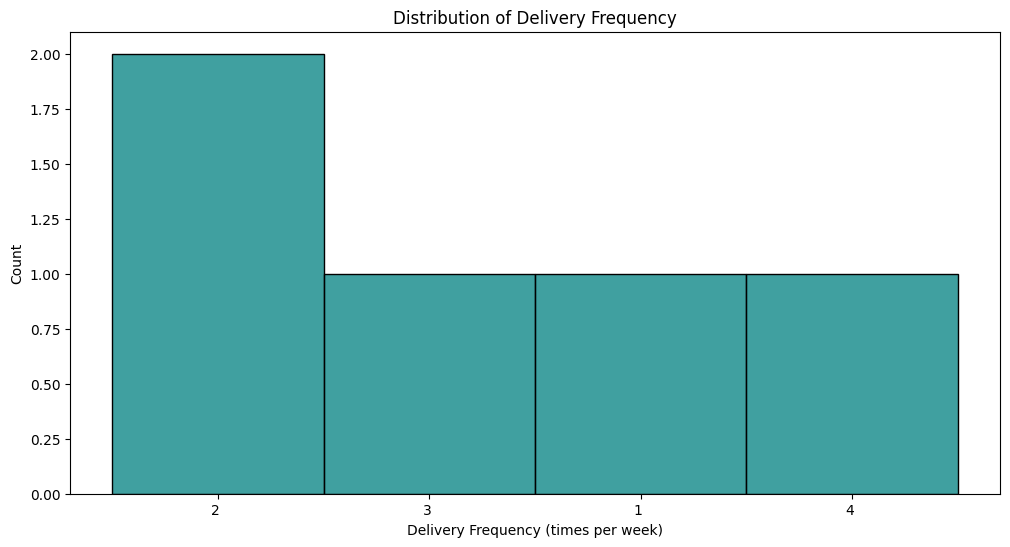

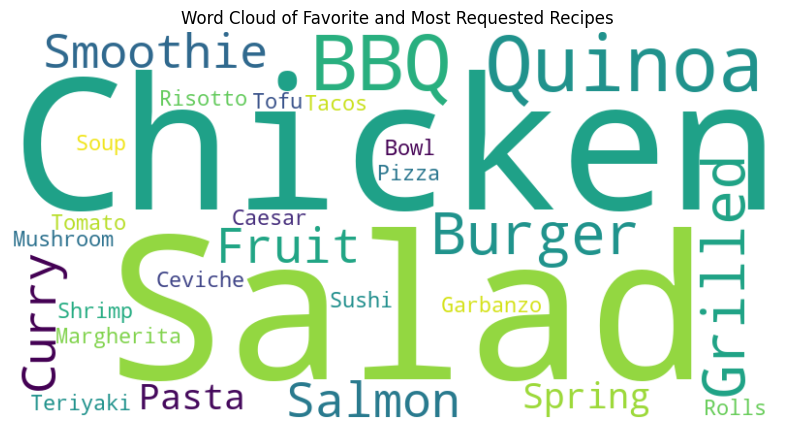

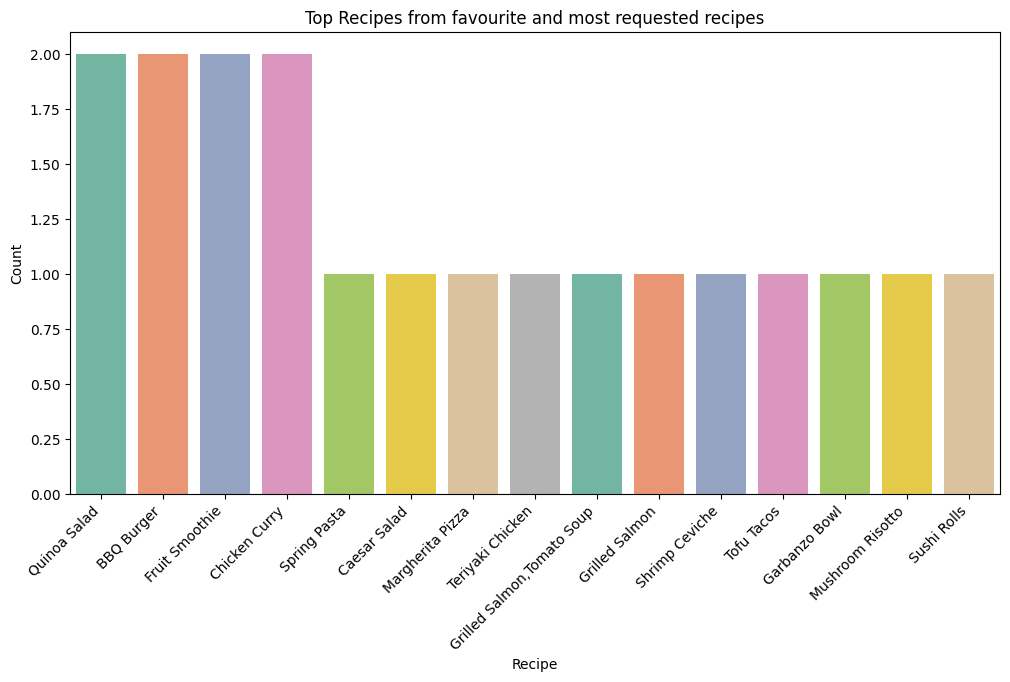

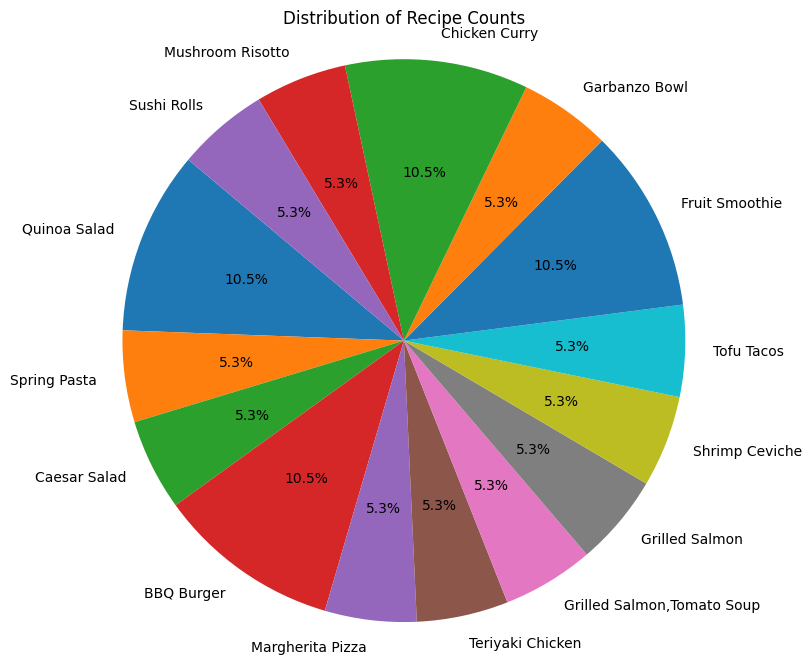

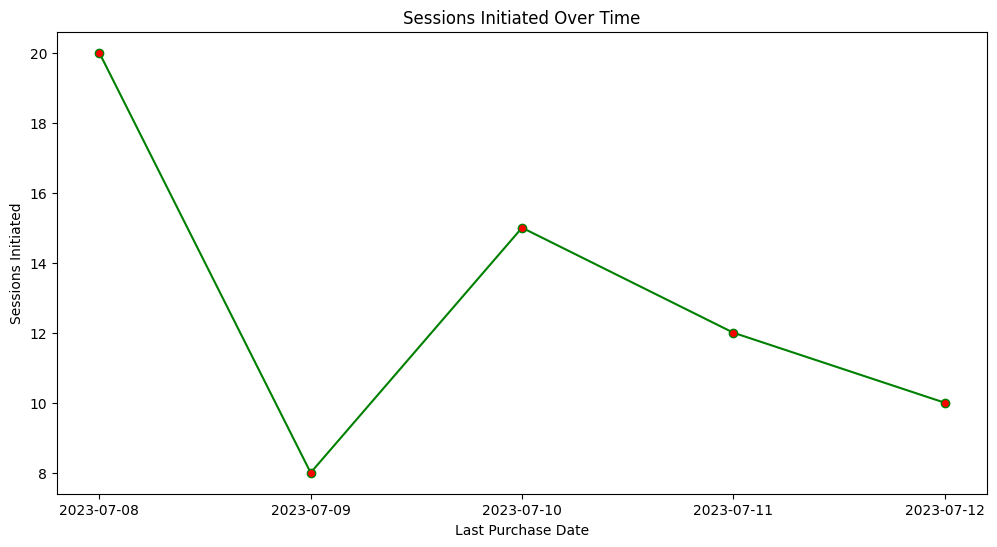

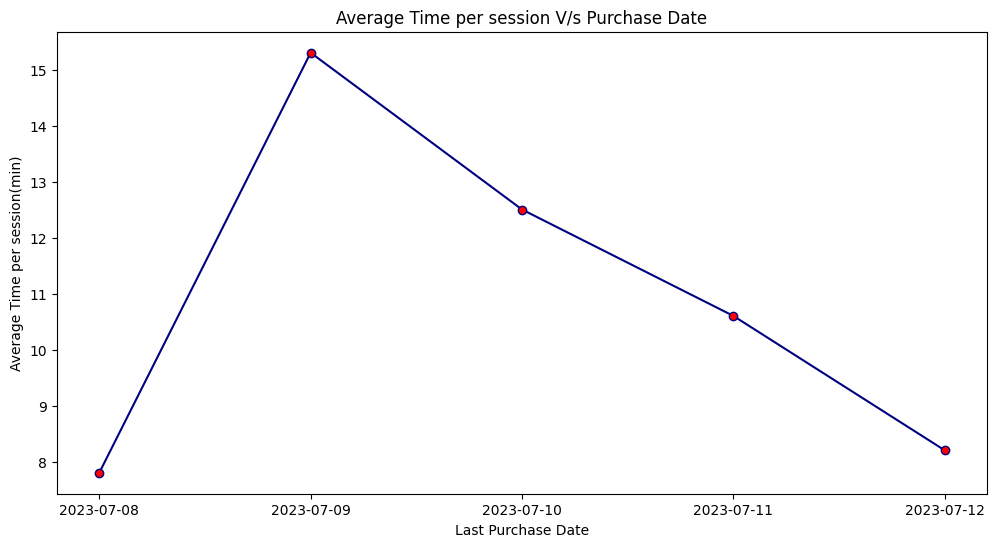

In [35]:
visualizations()

In [36]:
def benefits():
    def cmpy_benefits(final_combined_data):
    
        #********************************************AUTOBASKET V/S HELLOWFRESH CANADA********************************************
    
        #**********************Growth Opportunities**********************
        # Data for current and projected sales
        data = {
          "Company": ["HelloFresh Canada", "AutoBasket"],
          "Current Sales": [500000, 750000],
          "Projected Sales": [750000, 950000]
        }
        # Create a neat and tidy bar chart using Seaborn
        plt.figure(figsize=(12, 6))
        # Use the barplot function from Seaborn
        sns.barplot(x="Company", y="Current Sales", data=data, color="teal", label="Current Sales")
        sns.barplot(x="Company", y="Projected Sales", data=data, color="lightgreen", bottom=data["Current Sales"], label="Projected Sales")
        plt.xlabel("Companies")
        plt.ylabel("Sales (in dollars)")
        plt.title("Growth Opportunities")
        plt.legend()
        plt.tight_layout()
        #plt.show()
        plt.savefig('/Users/krishnamenon/AIMT/WILP/Task 5/Main/static/Growth_Opportunities.png')
    
        #**********************Market Share Distribution**********************
        market_share = [40, 60]  # Example percentages
        # Create a pie chart
        companies = ['HelloFresh Canada', 'AutoBasket']
        plt.figure(figsize=(8, 8))
        plt.pie(market_share, labels=companies, autopct='%1.1f%%', startangle=140)
        plt.title('Market Share Distribution')
        plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
        #plt.show()
        plt.savefig('/Users/krishnamenon/AIMT/WILP/Task 5/Main/static/Market_Share_Distribution.png')
    
        #**********************Sales Trends Over Time**********************
        # Sample data for sales trends over time
        months = ['Jan', 'Feb', 'Mar', 'Apr', 'May']
        autobasket_sales = [120000, 130000, 140000, 135000, 145000]  # Example data in dollars
        hellofresh_sales = [35000, 40000, 42000, 38000, 45000]
        # Create a line chart
        plt.figure(figsize=(12, 6))
        plt.plot(months, hellofresh_sales, label='HelloFresh Canada', marker='o',color='red', markerfacecolor='black')
        plt.plot(months, autobasket_sales, label='AutoBasket', marker='o',color='blue', markerfacecolor='black')
        plt.xlabel('Months')
        plt.ylabel('Sales (in dollars)')
        plt.title('Sales Trends Over Time')
        plt.legend()
        #plt.show()
        plt.savefig('/Users/krishnamenon/AIMT/WILP/Task 5/Main/static/Sales_Trends_Over_Time.png')
        
    cmpy_benefits(final_combined_data)

    

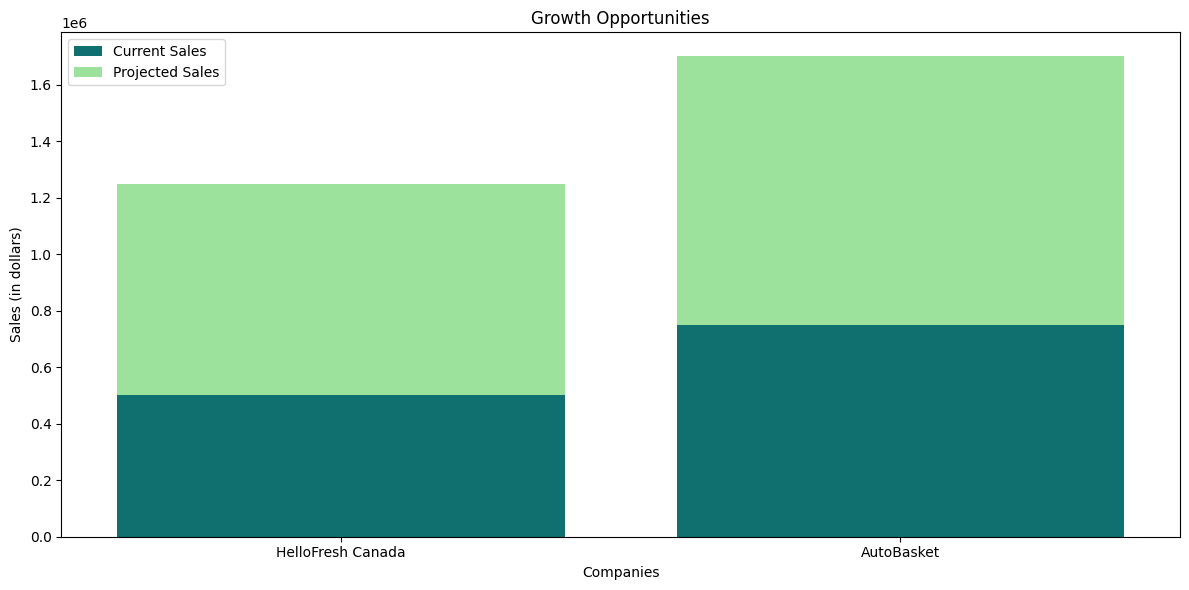

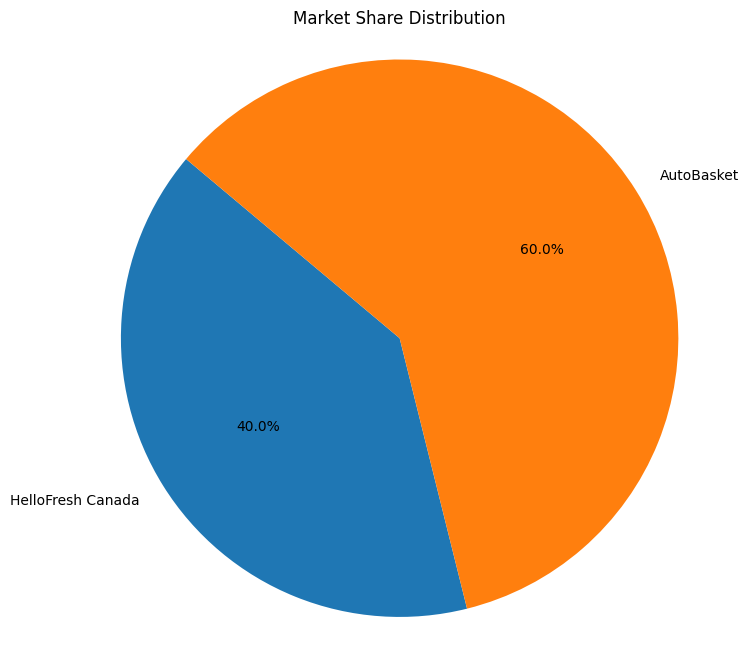

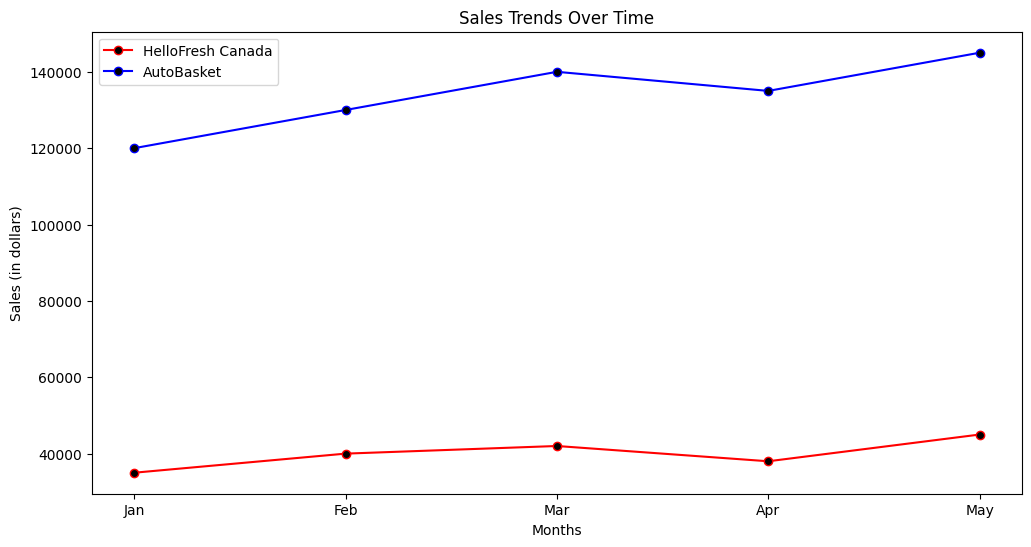

In [38]:
benefits()